# Loading Libraries, connect drive

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from numpy import errstate,isneginf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


import zipfile
import os
import json
import requests
import io
import copy
#import biomart
#import umap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Prepare data

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast-cancer-kaggle-dataset.csv")
print(df2.shape)
df2.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


So, we have 32 features (including target variable) and 569 samples.

In [ ]:
#df2.set_index(df2.loc[:, 'id'], inplace=True)
df2.drop('id', axis=1, inplace=True) # we can drop id number, as its simply patient id.
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df3=df2
df3.drop("diagnosis", axis=1, inplace=False)
col=df2.iloc[:,0:1]
df3['Diagnosis']=col
df3.drop("diagnosis", axis=1, inplace=True)
df3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
df3['Diagnosis'].value_counts() # this is the target variable (classification problem)

,count
Diagnosis,
B,357
M,212


In [ ]:
px.histogram(data_frame=df3, x='Diagnosis', color='Diagnosis',color_discrete_sequence=['#FF6666','#66FFB2'])

In [ ]:
le = LabelEncoder()
df3['Diagnosis']=le.fit_transform(df3['Diagnosis'])
df3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df3['Diagnosis'].value_counts() # so the proportion of samples of the classes is somewhat skewed; have more of class 0.

,count
Diagnosis,
0,357
1,212


## Logistic Regression

We will implement logistic regression for our classification task. We need the following components- sigmoid function, loss function (cross-entropy), gradient descent and training.

In [ ]:
import numpy as np
import pandas as pd

def sigmoid(z): #sigmoid fn for logistic regression
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred): # loss function (cross-entropy loss)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def train_logistic_regression(X, y, lr=0.01, epochs=1000): #training
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        linear_output = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_output)

        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) # gradients
        db = (1 / n_samples) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias

def predict_proba(X, weights, bias): # predict probabilities
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

def predict(X, weights, bias, threshold=0.5): #finally predict class label based on threshold value.
    proba = predict_proba(X, weights, bias)
    return (proba >= threshold).astype(int)


In [ ]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [ ]:
X = df3.drop(columns=["Diagnosis"])
X = (X - X.mean(axis=0)) / X.std(axis=0) #normalizing x
y = df3['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=55, shuffle=True)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
model = LogisticRegressionCustom(lr=0.01, epochs=1000)
model.train(X_train, y_train)

# Predict class labels
test_predictions = model.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test)
print(test_accuracy)



0.9736842105263158


In [ ]:
weights, bias = train_logistic_regression(X, y, lr=0.01, epochs=1000)

# Predict on training data (example)
predictions = predict(X, weights, bias)
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.2491
Epoch 200, Loss: 0.1867
Epoch 300, Loss: 0.1584
Epoch 400, Loss: 0.1417
Epoch 500, Loss: 0.1304
Epoch 600, Loss: 0.1222
Epoch 700, Loss: 0.1158
Epoch 800, Loss: 0.1108
Epoch 900, Loss: 0.1066
Training Accuracy: 0.9824


In [ ]:
weights, bias = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

test_predictions = predict(X_test, weights, bias)

test_accuracy = np.mean(test_predictions == y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.2477
Epoch 200, Loss: 0.1849
Epoch 300, Loss: 0.1566
Epoch 400, Loss: 0.1400
Epoch 500, Loss: 0.1288
Epoch 600, Loss: 0.1207
Epoch 700, Loss: 0.1145
Epoch 800, Loss: 0.1095
Epoch 900, Loss: 0.1054
Test Accuracy: 0.9737


## Decision Tree

We will implement a simple decision tree using gini index for the splits. Instead of class labels, we will design our decision tree to predict probability of class label (say 1) and threshold it against a value for final prediction. We are doing this as this will come ni handy later during our federated setting.

In [ ]:
import numpy as np

class DecisionTreeNode: # we define a node class for easier operations
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_prob, feature_index=None, threshold=None, left=None, right=None):
        self.gini = gini # use gini index for splits
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_prob = predicted_prob
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X_local, y_local):
        self.n_classes_ = len(set(y_local))
        self.tree = self._grow_tree(X_local, y_local)

    def predict_proba(self, X_local): # predicts probabilities
        return np.array([self._predict_proba(inputs) for inputs in X_local])

    def predict(self, X_local, threshold=0.5):
        proba = self.predict_proba(X_local)
        return (proba[:, 1] >= threshold).astype(int)


    def _gini(self, y_local):
        m = len(y_local)
        if m == 0:
            return 0
        counts = np.bincount(y_local)
        probs = counts / m
        return 1 - np.sum(probs ** 2)

    def _best_split(self, X_local, y_local): # finds the best split
        m, n = X_local.shape
        if m < self.min_samples_split:
            return None, None

        best_gini = 1.0
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X_local[:, idx], y_local)))
            num_left = [0] * self.n_classes_
            num_right = np.bincount(classes, minlength=self.n_classes_)

            for i in range(1, m):  # Possible split positions
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_) if i > 0)
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_) if (m - i) > 0)
                gini = (i * gini_left + (m - i) * gini_right) / m

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X_local, y_local, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_prob = num_samples_per_class[1] / sum(num_samples_per_class)  # probability of class 1
        node = DecisionTreeNode(
            gini=self._gini(y_local),
            num_samples=len(y_local),
            num_samples_per_class=num_samples_per_class,
            predicted_prob=predicted_prob
        )

        if depth < self.max_depth and node.gini > 0:
            idx, thr = self._best_split(X_local, y_local)
            if idx is not None:
                indices_left = X_local[:, idx] < thr
                X_left, y_left = X_local[indices_left], y_local[indices_left]
                X_right, y_right = X_local[~indices_left], y_local[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict_proba(self, inputs):
        node = self.tree
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return np.array([1 - node.predicted_prob, node.predicted_prob]) # returns probabilities of the class.


In [ ]:
X_train2 = np.array(X_train)   # Convert to NumPy array
y_train2 = np.array(y_train).flatten()


tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train2, y_train2)

y_pred = tree.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


IndexError: string index out of range

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
print(f"Shape of X: {X_train.shape}")
print(f"Shape of y: {y_train.shape}")

In [ ]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Federated Setting

We will have a setting where data is split across 3 sites. Further, we will evaluate under the 3 real-life scenarios:


1.   All 3 sites have equal number of samples and equal distribution of classes
2.   Sites have unequal number of samples and proportional distribution of classes
3. Sites have unequal number of samples and non-proportional distribution of classes



Setting 1-

In [ ]:
X = df3.drop(columns=["Diagnosis"])
y = df3['Diagnosis']

X_temp, X_subset1, y_temp, y_subset1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
X_subset2, X_subset3, y_subset2, y_subset3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
print("Subset 1:", X_subset1.shape, y_subset1.shape)
print("Subset 2:", X_subset2.shape, y_subset2.shape)
print("Subset 3:", X_subset3.shape, y_subset3.shape)

Subset 1: (190, 30) (190,)
Subset 2: (189, 30) (189,)
Subset 3: (190, 30) (190,)


In [ ]:
print(y_subset1.value_counts())
print(y_subset2.value_counts())
print(y_subset3.value_counts())

Diagnosis
0    119
1     71
Name: count, dtype: int64
Diagnosis
0    119
1     70
Name: count, dtype: int64
Diagnosis
0    119
1     71
Name: count, dtype: int64


Setting 2

In [ ]:

X_temp, X_subsetS1, y_temp, y_subsetS1 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_subsetS2, X_subsetS3, y_subsetS2, y_subsetS3 = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)
print("Subset 1:", X_subsetS1.shape, y_subsetS1.shape)
print("Subset 2:", X_subsetS2.shape, y_subsetS2.shape)
print("Subset 3:", X_subsetS3.shape, y_subsetS3.shape)

Subset 1: (285, 30) (285,)
Subset 2: (170, 30) (170,)
Subset 3: (114, 30) (114,)


In [ ]:
print(y_subsetS1.value_counts())
print(y_subsetS2.value_counts())
print(y_subsetS3.value_counts())

Diagnosis
0    179
1    106
Name: count, dtype: int64
Diagnosis
0    107
1     63
Name: count, dtype: int64
Diagnosis
0    71
1    43
Name: count, dtype: int64


Setting 3

In [ ]:

X_temp, X_subsetSS1, y_temp, y_subsetSS1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_subsetSS2, X_subsetSS3, y_subsetSS2, y_subsetSS3 = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
print("Subset 1:", X_subsetSS1.shape, y_subsetSS1.shape)
print("Subset 2:", X_subsetSS2.shape, y_subsetSS2.shape)
print("Subset 3:", X_subsetSS3.shape, y_subsetSS3.shape)

Subset 1: (285, 30) (285,)
Subset 2: (170, 30) (170,)
Subset 3: (114, 30) (114,)


In [ ]:
print(y_subsetSS1.value_counts())
print(y_subsetSS2.value_counts())
print(y_subsetSS3.value_counts())

Diagnosis
0    187
1     98
Name: count, dtype: int64
Diagnosis
0    98
1    72
Name: count, dtype: int64
Diagnosis
0    72
1    42
Name: count, dtype: int64


## Setting 1

In [321]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = df3.drop(columns=["Diagnosis"])
  y = df3['Diagnosis']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [322]:
def build_site_classifier(random_state, X, y, at_site):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [323]:
from sklearn.metrics import accuracy_score


In [324]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [325]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.5):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [326]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [327]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [328]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [329]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [330]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.30)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [331]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)
    plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, plot_title, fname)
    plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     plot_title,fname)
    plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     plot_title,fname)



###This cell is the main function call




In [332]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)





Data at site1:  (152, 30) (38, 30) (152,) (38,)
Data at site2:  (151, 30) (38, 30) (151,) (38,)
Data at site3:  (152, 30) (38, 30) (152,) (38,)
accuracy is 0.9736842105263158
accuracy is 0.9473684210526315
accuracy is 0.9736842105263158
Model's Accuracy at site 1:  0.9736842105263158
Model's Accuracy at site 2:  0.9473684210526315
Model's Accuracy at site 3:  0.9736842105263158


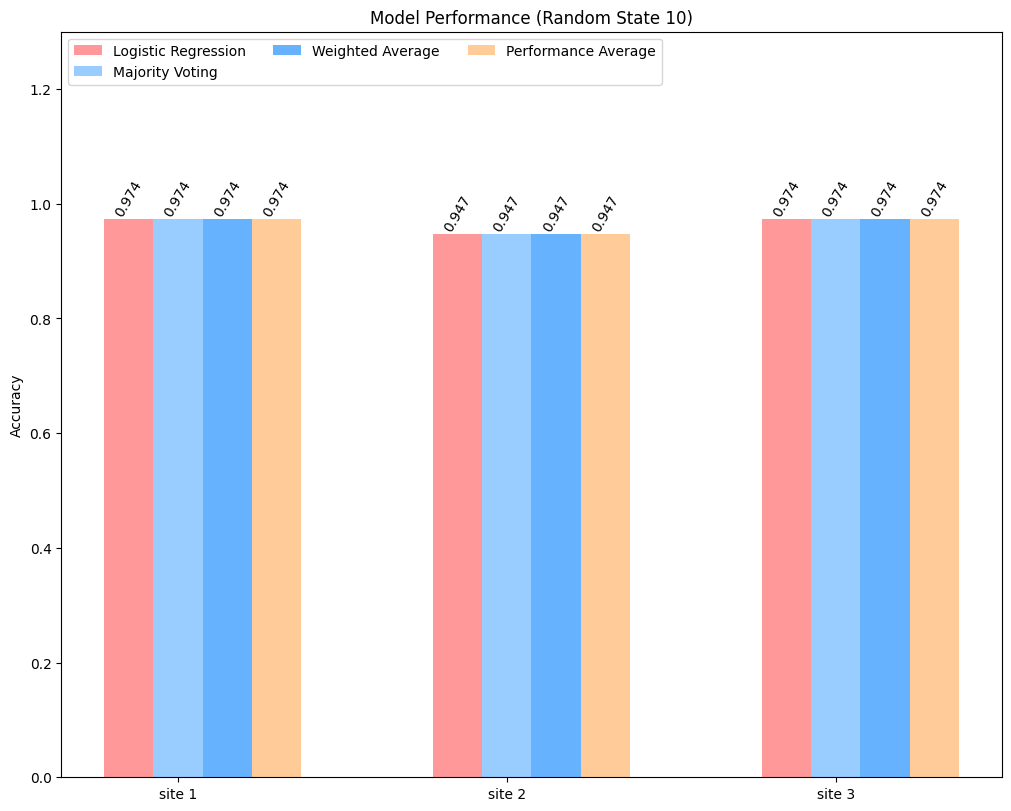

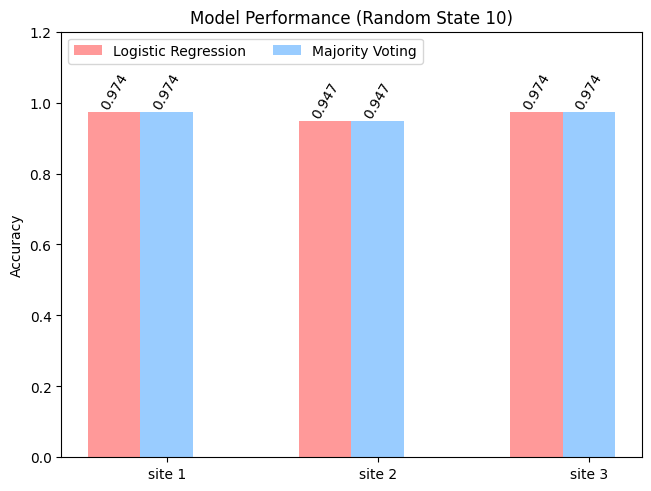

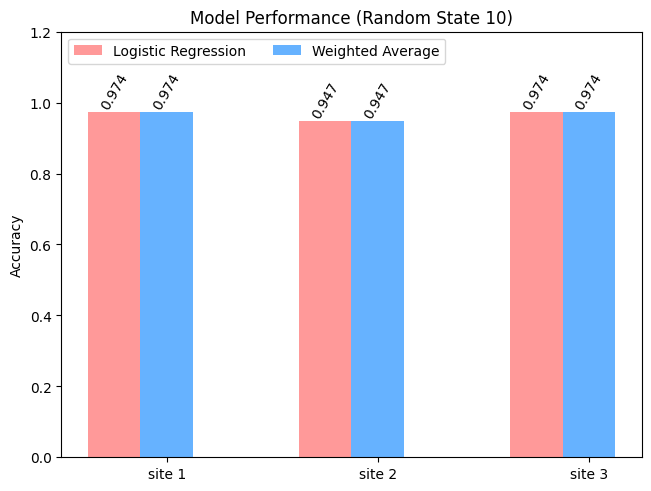

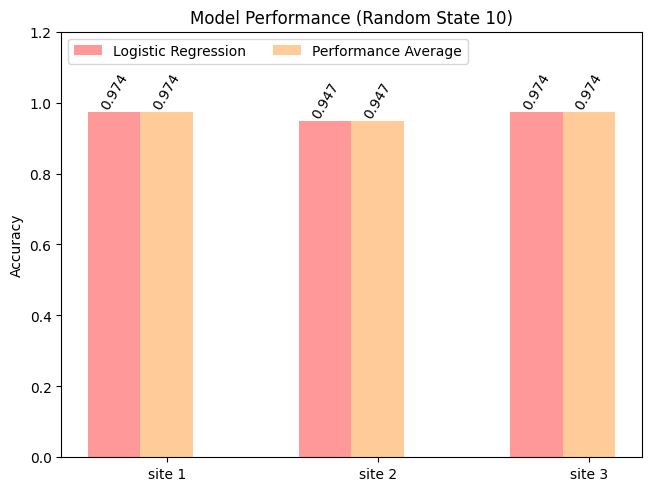

Data at site1:  (152, 30) (38, 30) (152,) (38,)
Data at site2:  (151, 30) (38, 30) (151,) (38,)
Data at site3:  (152, 30) (38, 30) (152,) (38,)
accuracy is 0.9736842105263158
accuracy is 1.0
accuracy is 0.9210526315789473
Model's Accuracy at site 1:  0.8947368421052632
Model's Accuracy at site 2:  1.0
Model's Accuracy at site 3:  0.9473684210526315


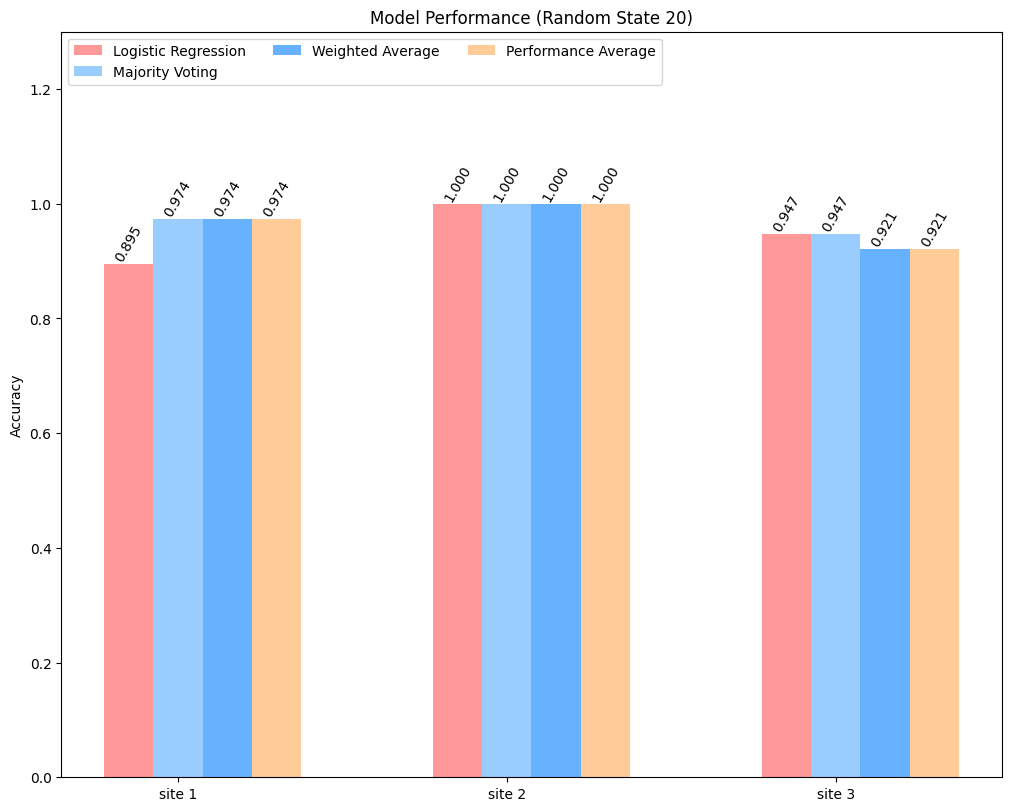

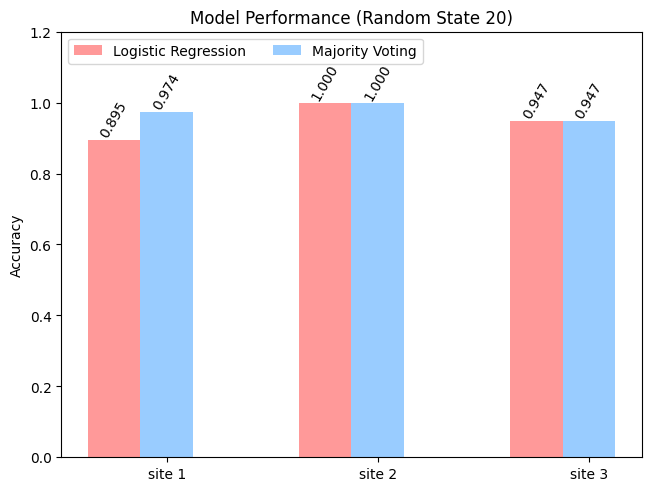

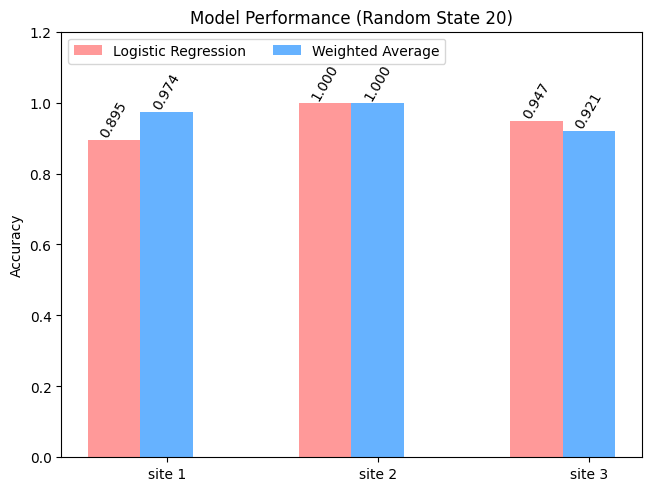

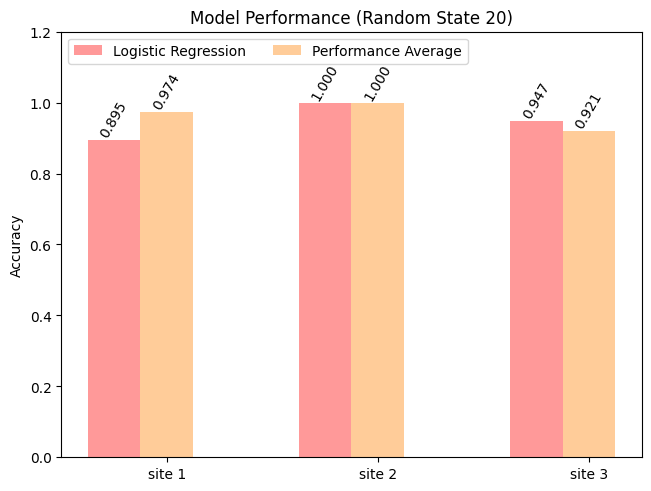

Data at site1:  (152, 30) (38, 30) (152,) (38,)
Data at site2:  (151, 30) (38, 30) (151,) (38,)
Data at site3:  (152, 30) (38, 30) (152,) (38,)
accuracy is 1.0
accuracy is 1.0
accuracy is 0.9736842105263158
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9736842105263158
Model's Accuracy at site 3:  0.9736842105263158


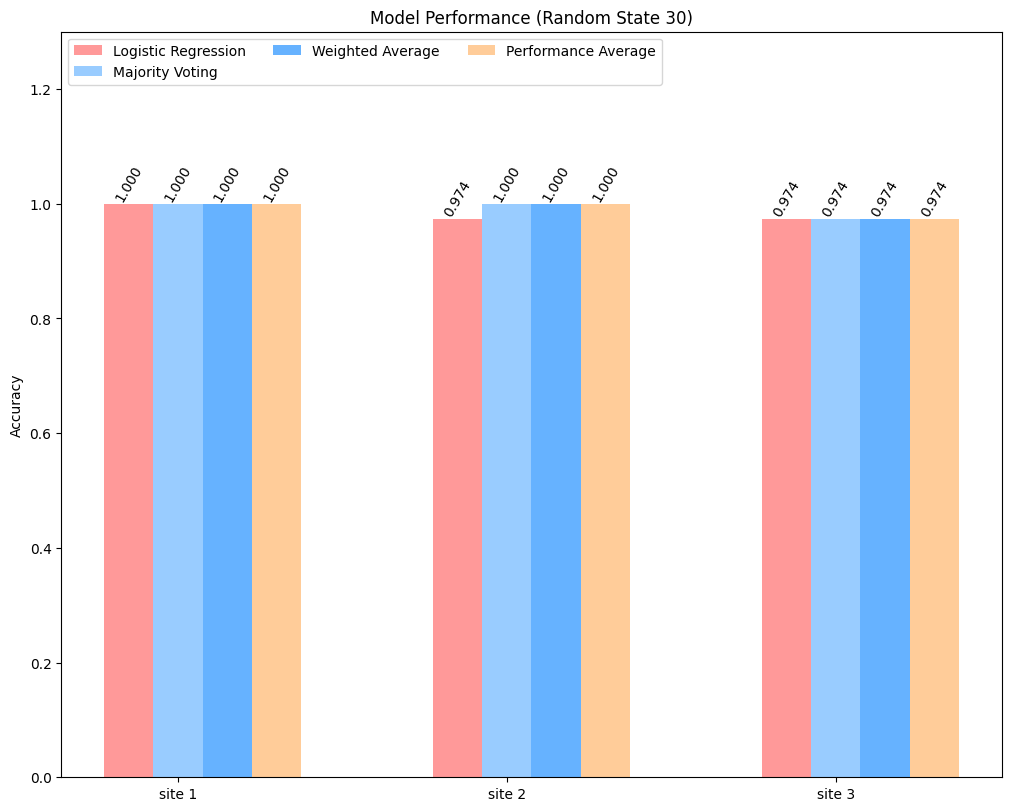

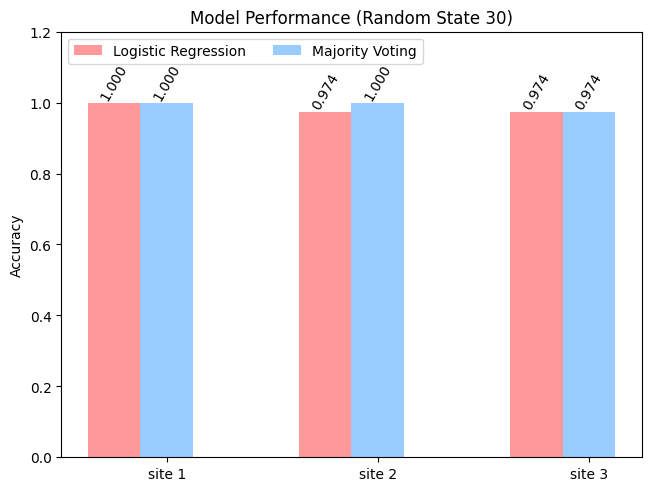

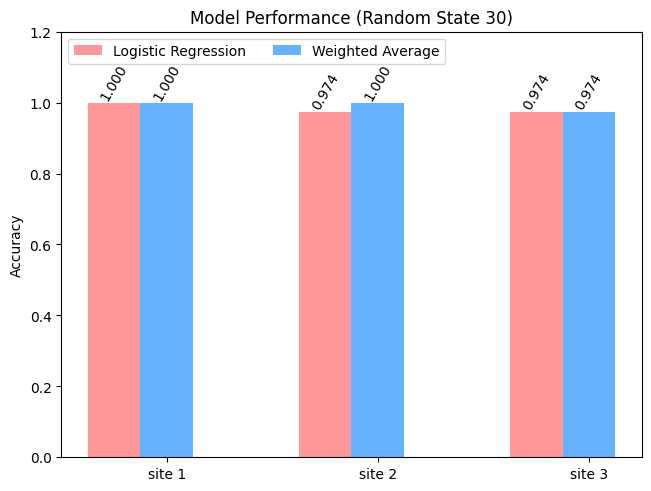

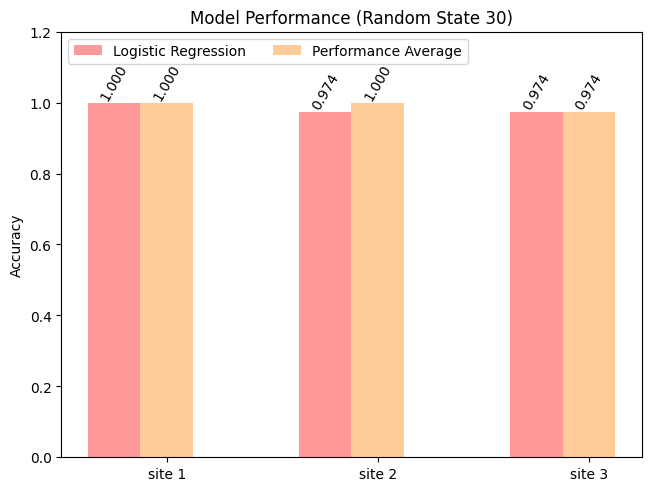

Data at site1:  (152, 30) (38, 30) (152,) (38,)
Data at site2:  (151, 30) (38, 30) (151,) (38,)
Data at site3:  (152, 30) (38, 30) (152,) (38,)
accuracy is 0.9736842105263158
accuracy is 1.0
accuracy is 1.0
Model's Accuracy at site 1:  0.9473684210526315
Model's Accuracy at site 2:  1.0
Model's Accuracy at site 3:  1.0


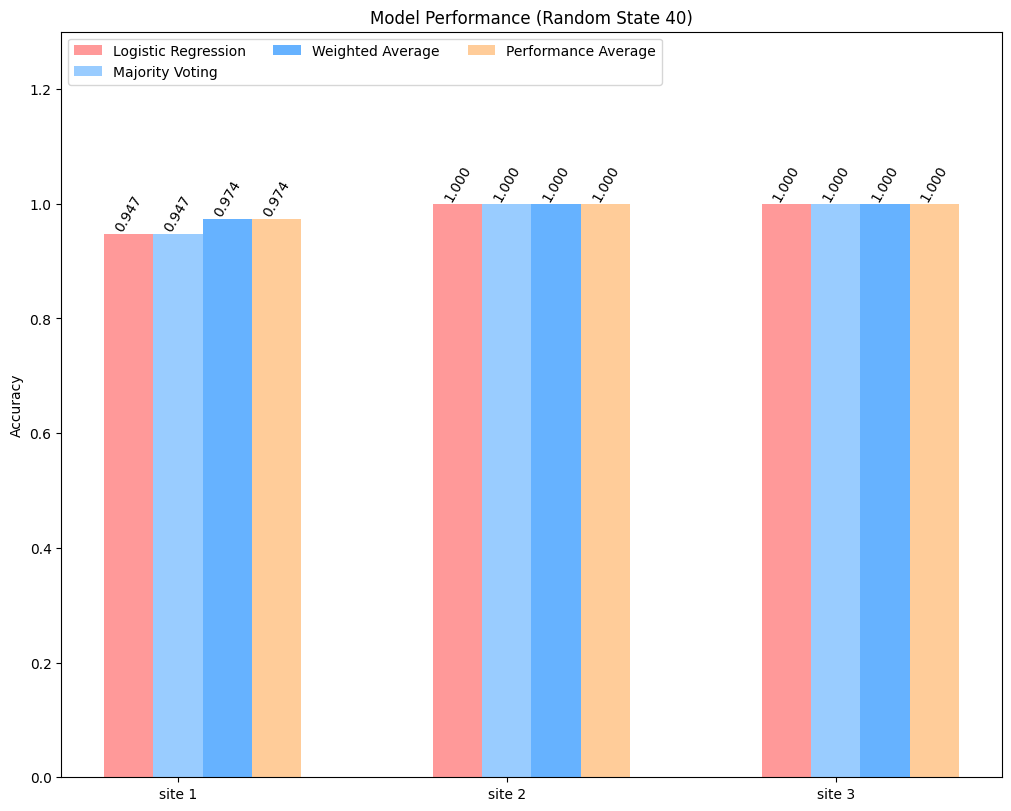

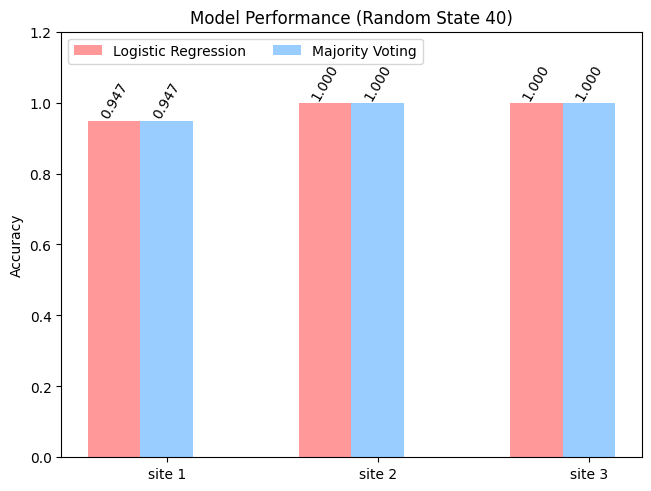

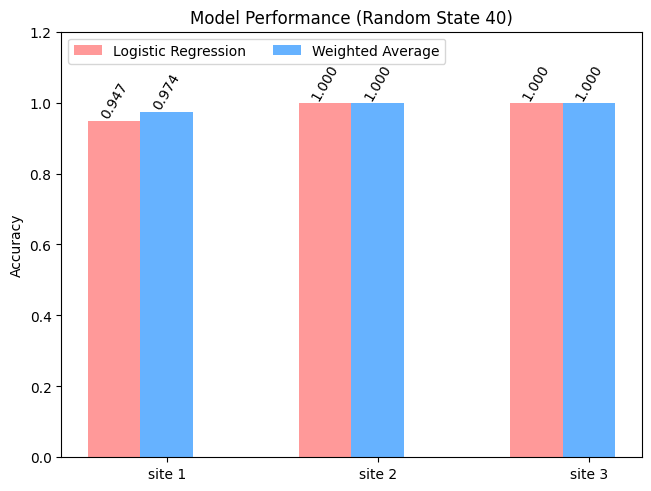

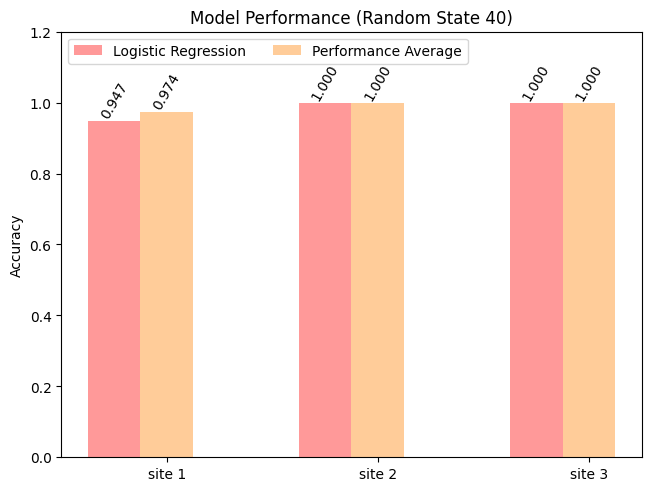

Data at site1:  (152, 30) (38, 30) (152,) (38,)
Data at site2:  (151, 30) (38, 30) (151,) (38,)
Data at site3:  (152, 30) (38, 30) (152,) (38,)
accuracy is 0.8947368421052632
accuracy is 0.9736842105263158
accuracy is 1.0
Model's Accuracy at site 1:  0.9210526315789473
Model's Accuracy at site 2:  0.9736842105263158
Model's Accuracy at site 3:  0.9736842105263158


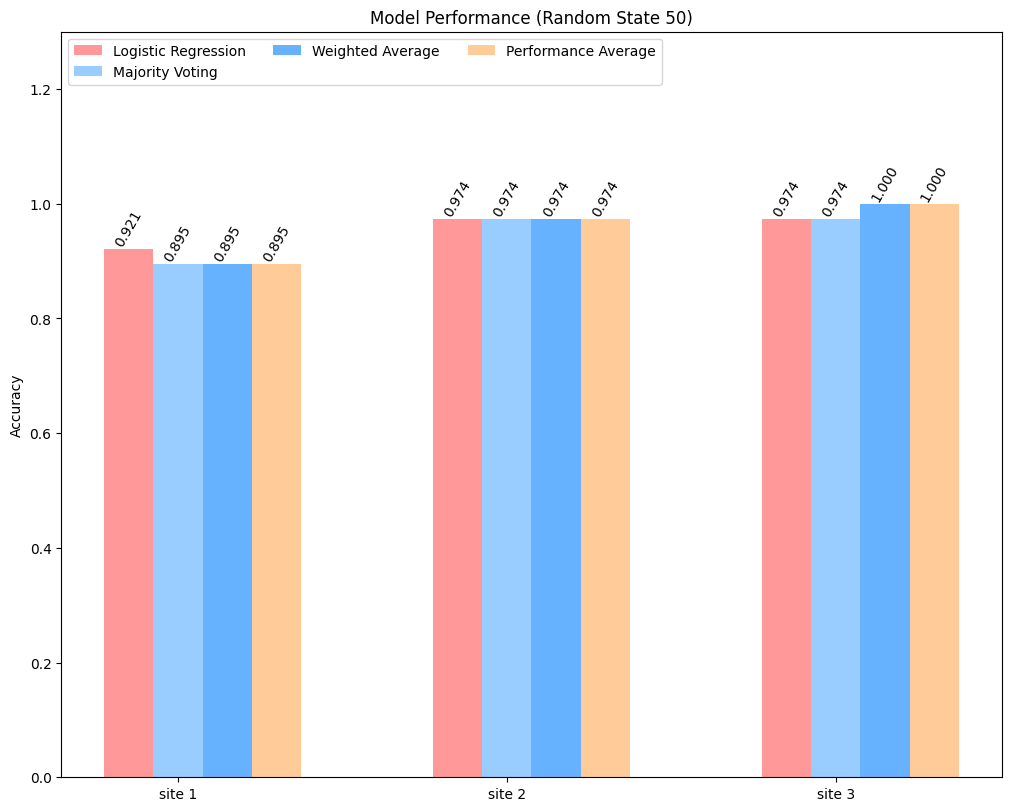

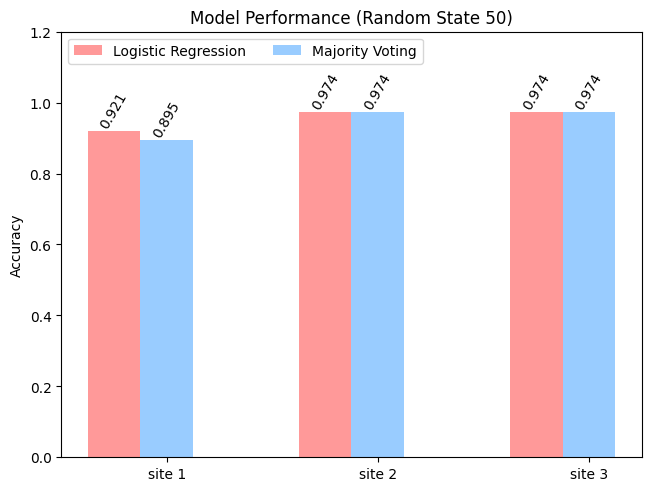

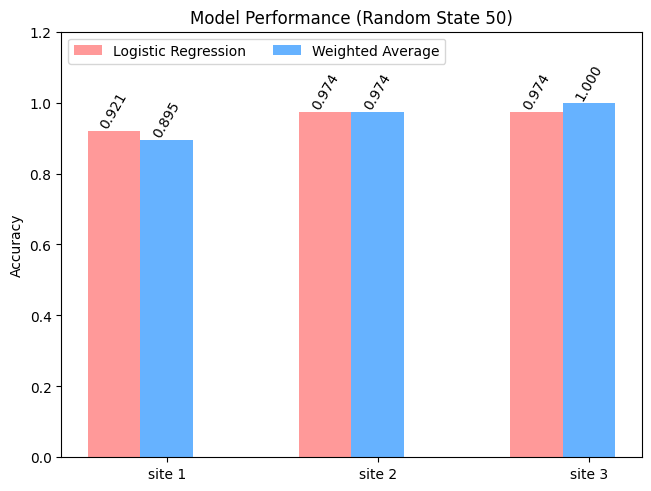

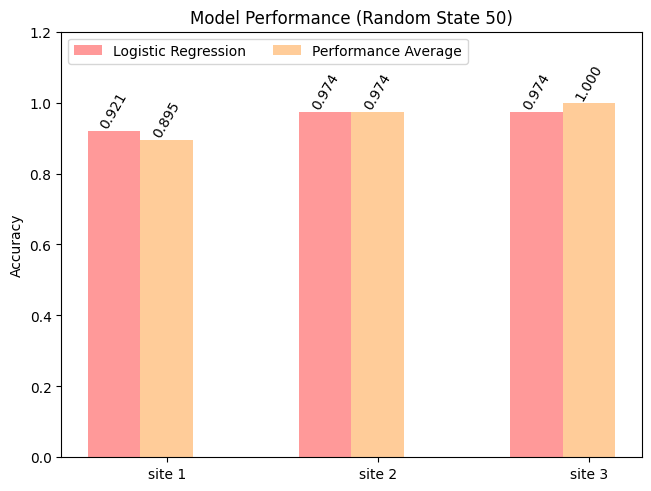

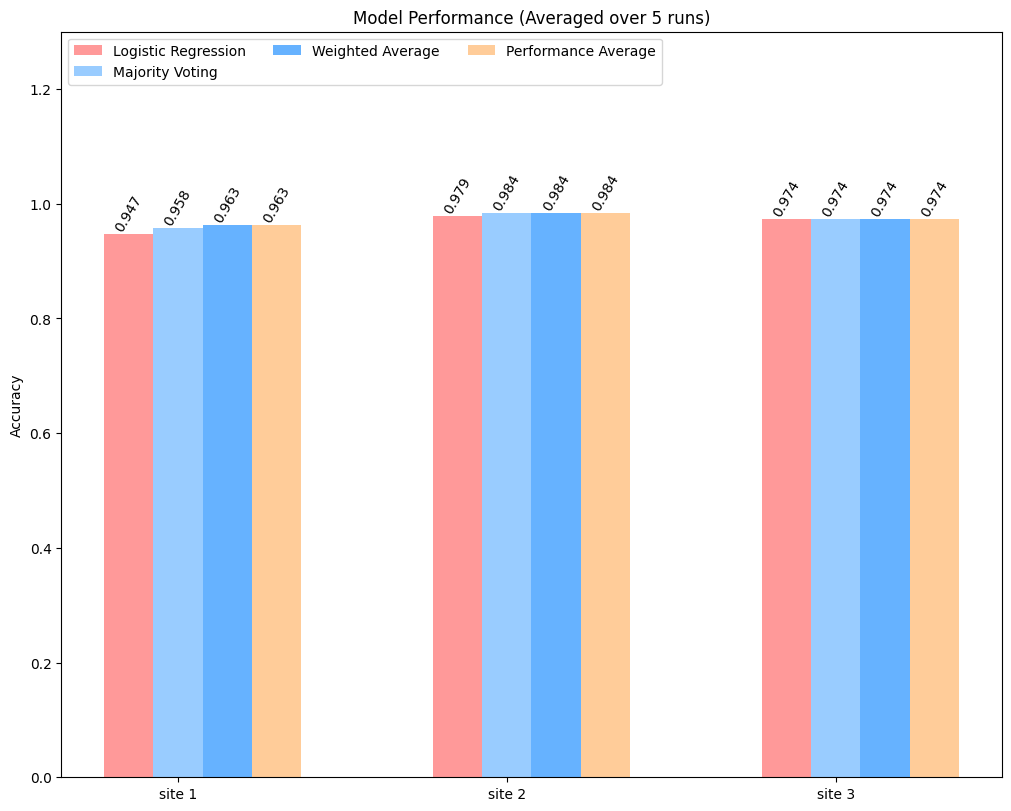

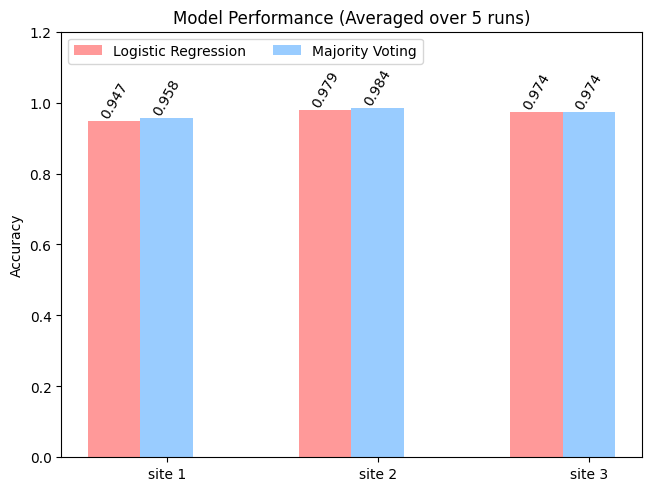

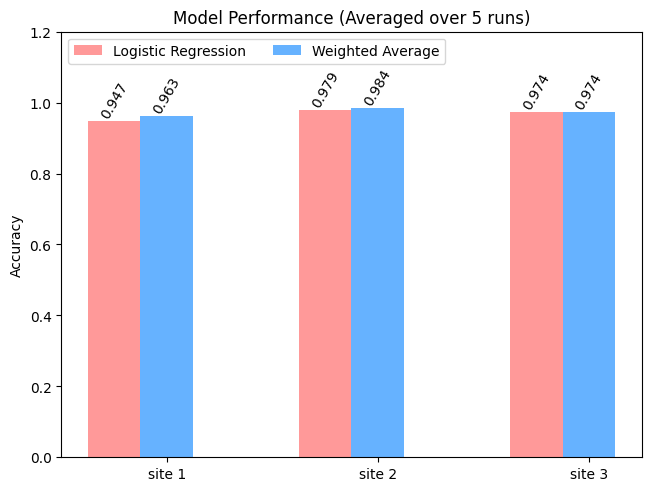

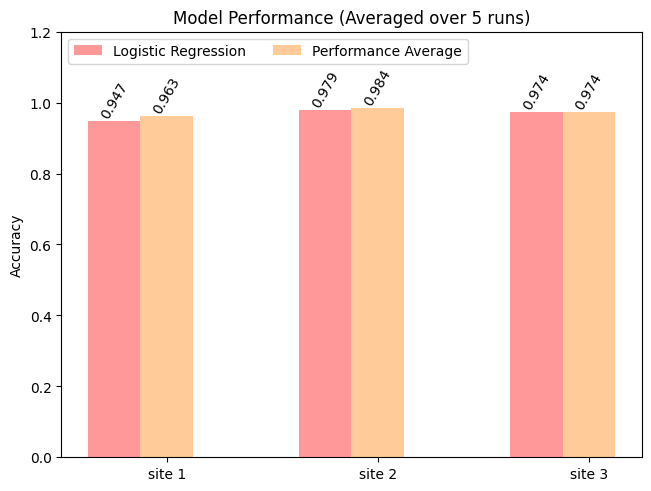

In [333]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)

##Setting 2

In [334]:
X_temp, X_subsetS1, y_temp, y_subsetS1 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_subsetS2, X_subsetS3, y_subsetS2, y_subsetS3 = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)
print("Subset 1:", X_subsetS1.shape, y_subsetS1.shape)
print("Subset 2:", X_subsetS2.shape, y_subsetS2.shape)
print("Subset 3:", X_subsetS3.shape, y_subsetS3.shape)

Subset 1: (285, 30) (285,)
Subset 2: (170, 30) (170,)
Subset 3: (114, 30) (114,)


In [335]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = df3.drop(columns=["Diagnosis"])
  y = df3['Diagnosis']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [336]:
def build_site_classifier(random_state, X, y, at_site):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [337]:
from sklearn.metrics import accuracy_score


In [338]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [339]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.5):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [340]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [341]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [342]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [343]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [344]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Vote': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Vote': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.30)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [345]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)
    plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, plot_title, fname)
    plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     plot_title,fname)
    plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     plot_title,fname)


###This cell is the main function call




In [346]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)





Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 0.9824561403508771
accuracy is 1.0
accuracy is 1.0
Model's Accuracy at site 1:  0.9824561403508771
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  1.0


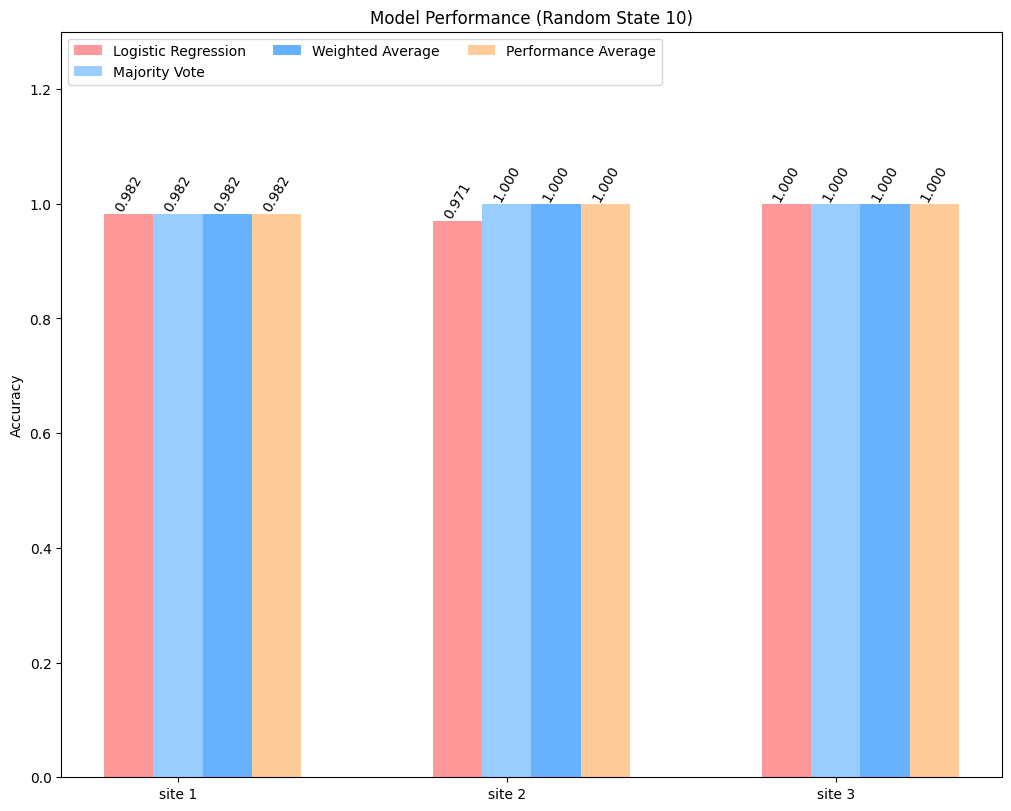

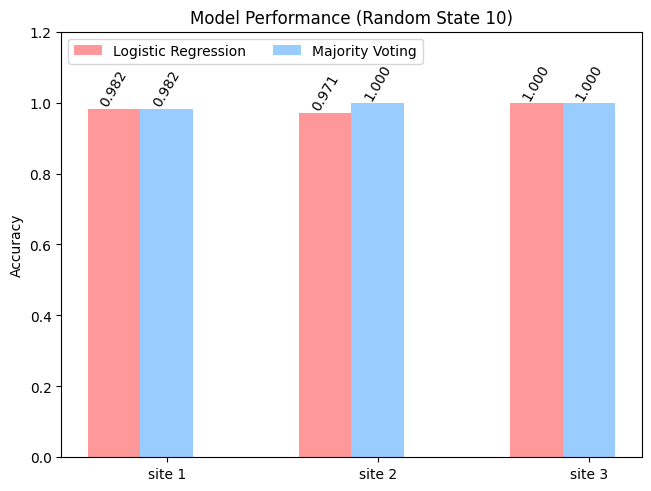

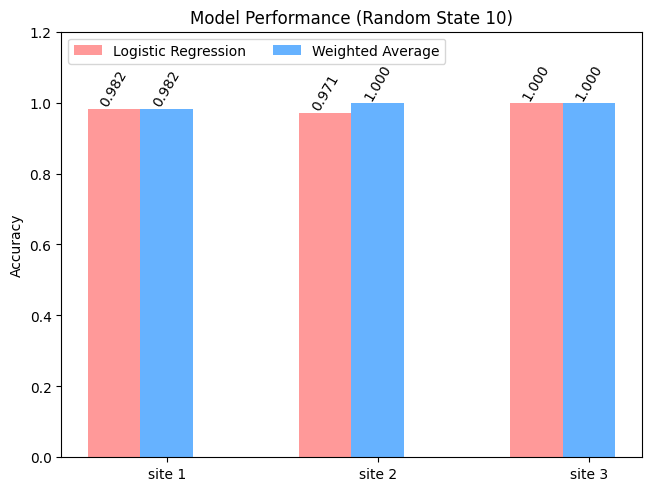

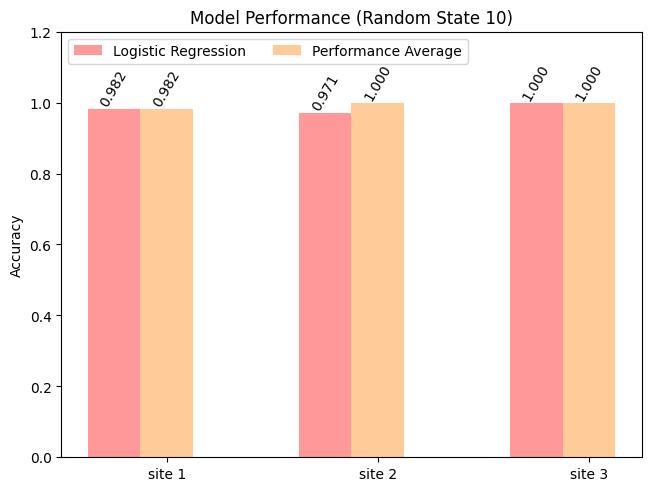

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 0.9824561403508771
accuracy is 1.0
accuracy is 0.9565217391304348
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  0.9565217391304348


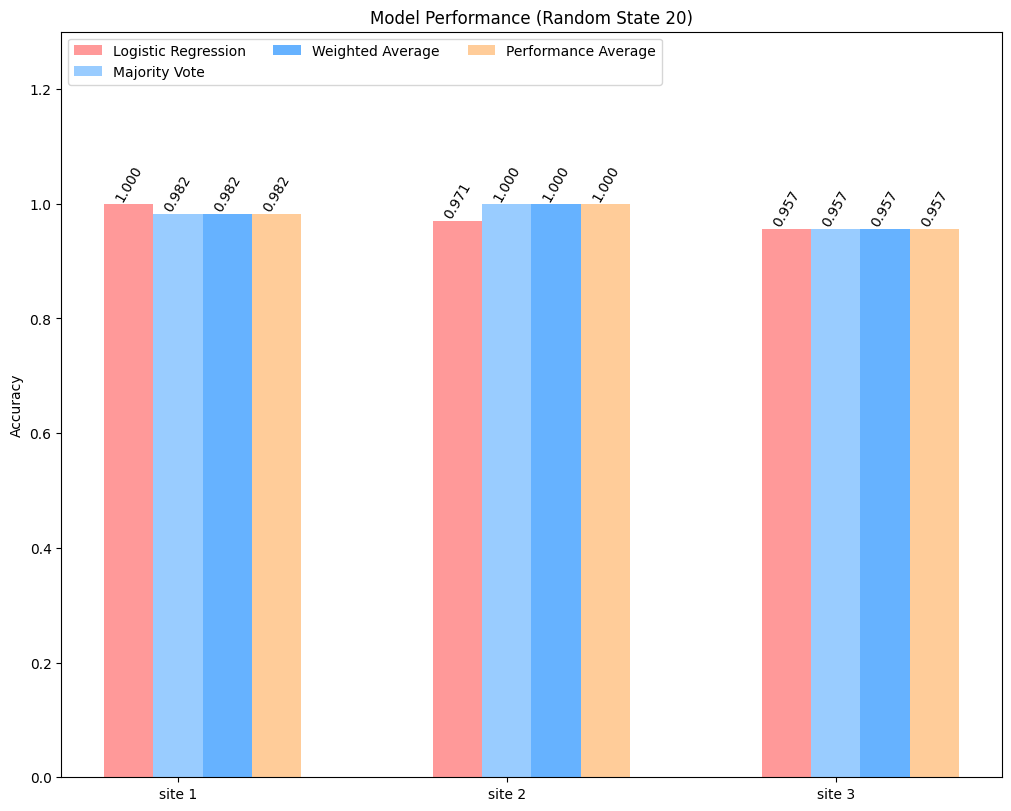

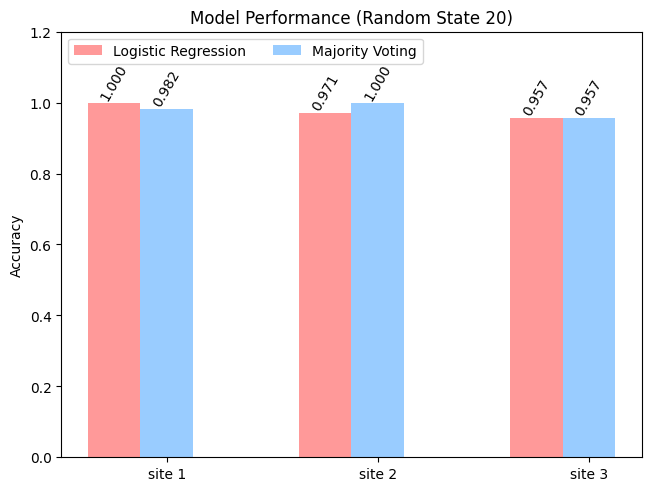

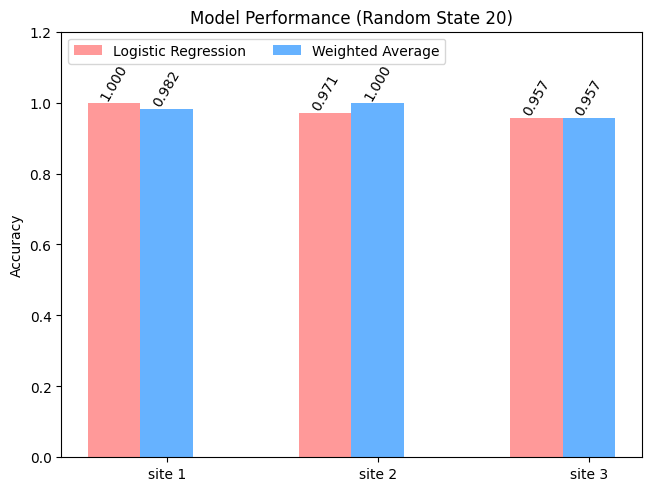

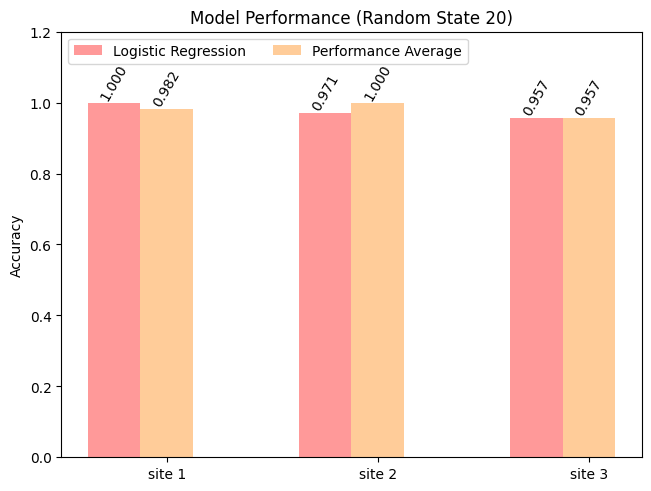

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 1.0
accuracy is 0.9411764705882353
accuracy is 1.0
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  1.0
Model's Accuracy at site 3:  1.0


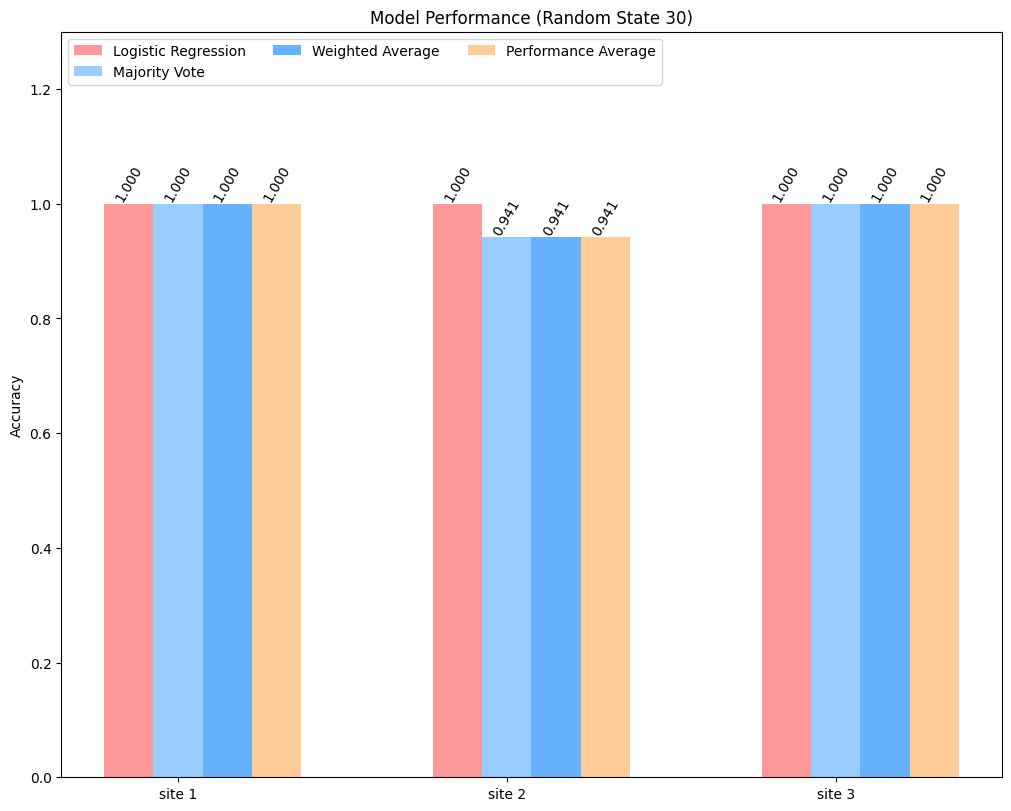

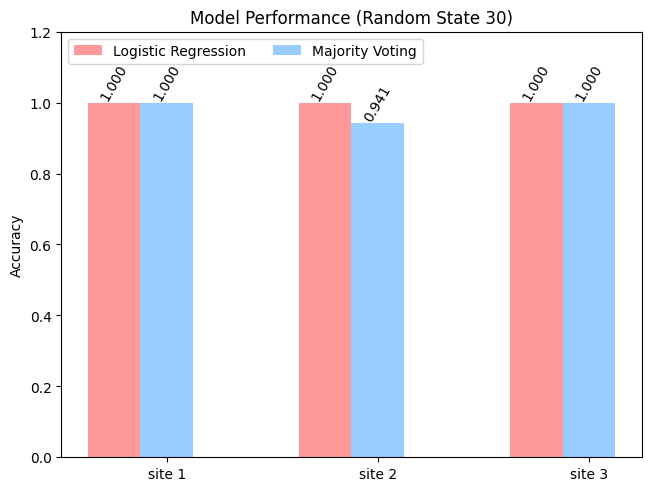

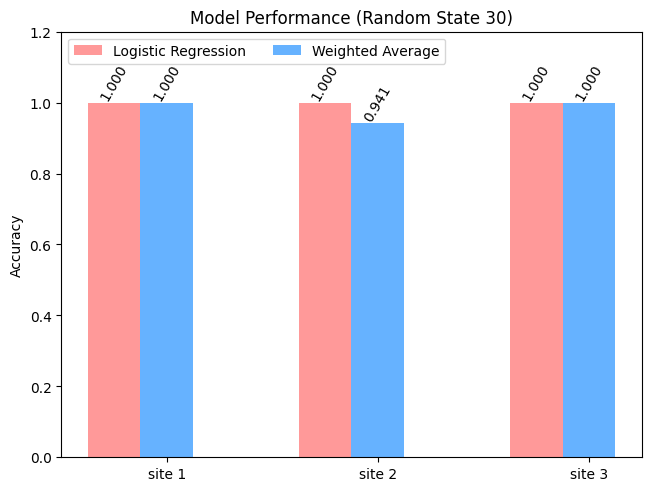

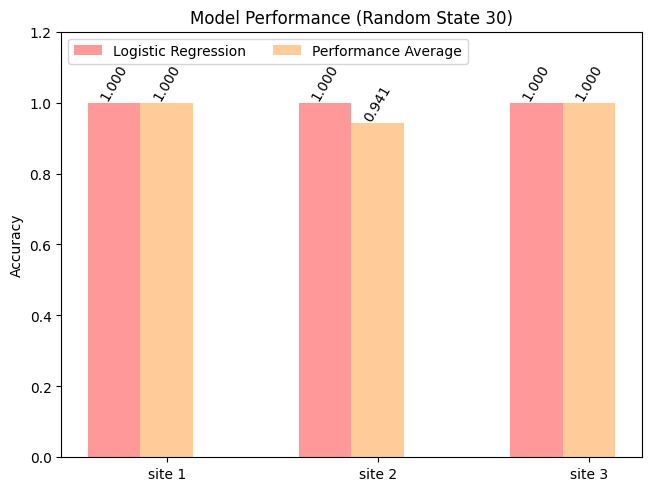

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 1.0
accuracy is 0.9705882352941176
accuracy is 0.9130434782608695
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  0.9130434782608695


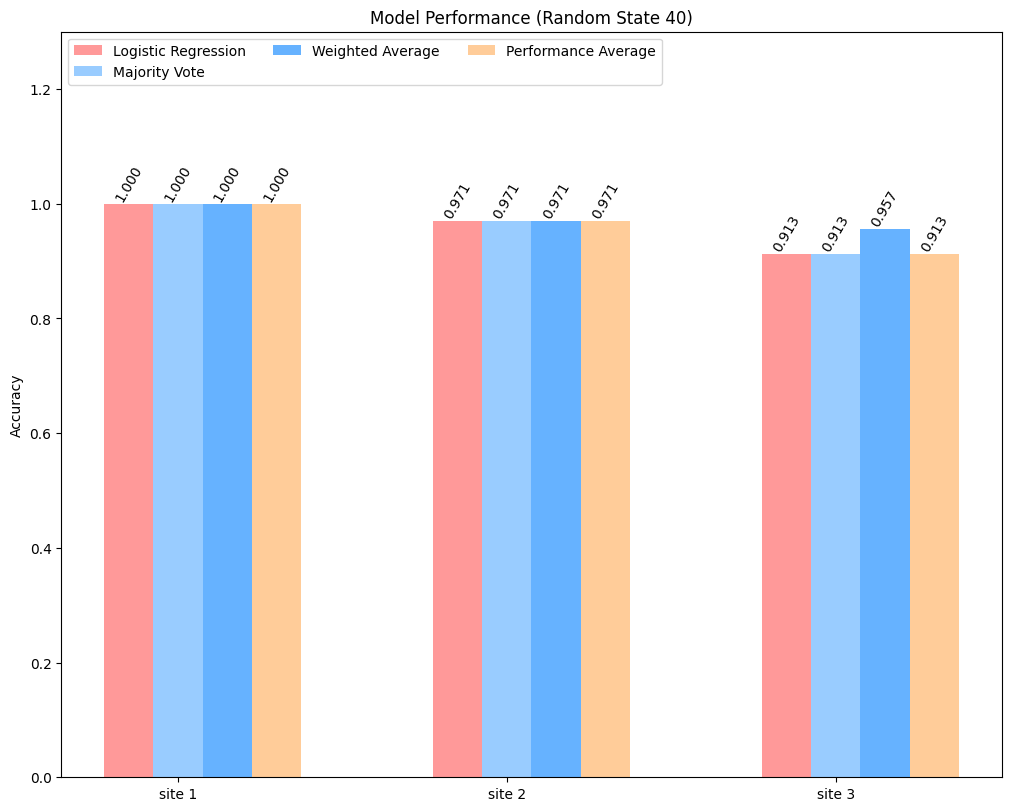

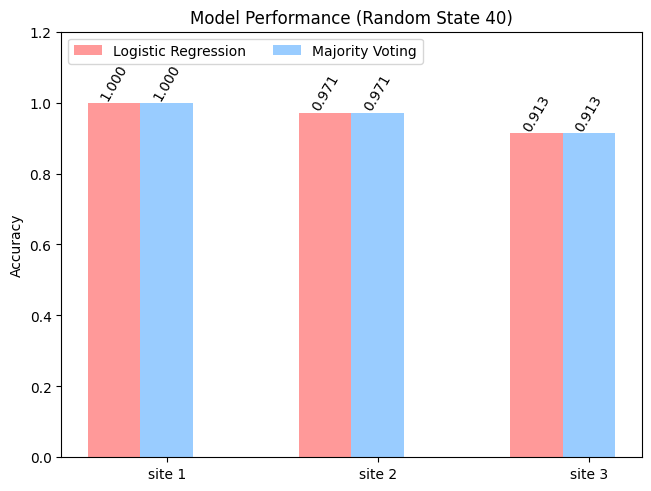

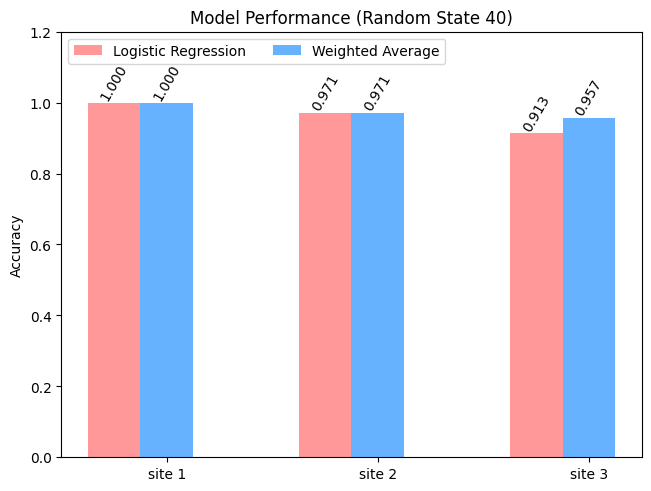

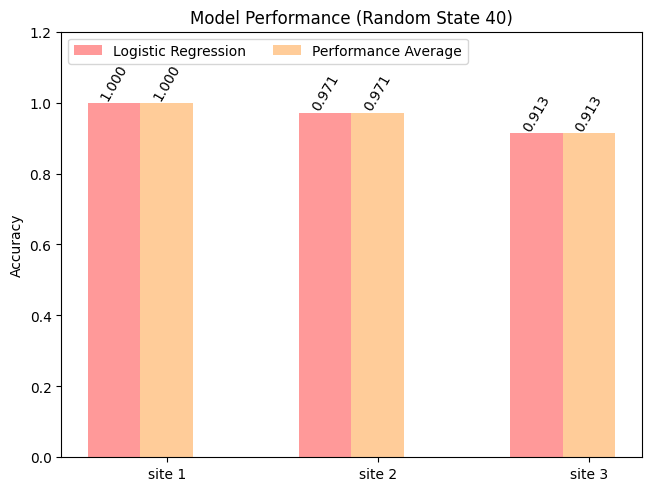

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 0.9824561403508771
accuracy is 0.9117647058823529
accuracy is 1.0
Model's Accuracy at site 1:  0.9824561403508771
Model's Accuracy at site 2:  0.9117647058823529
Model's Accuracy at site 3:  1.0


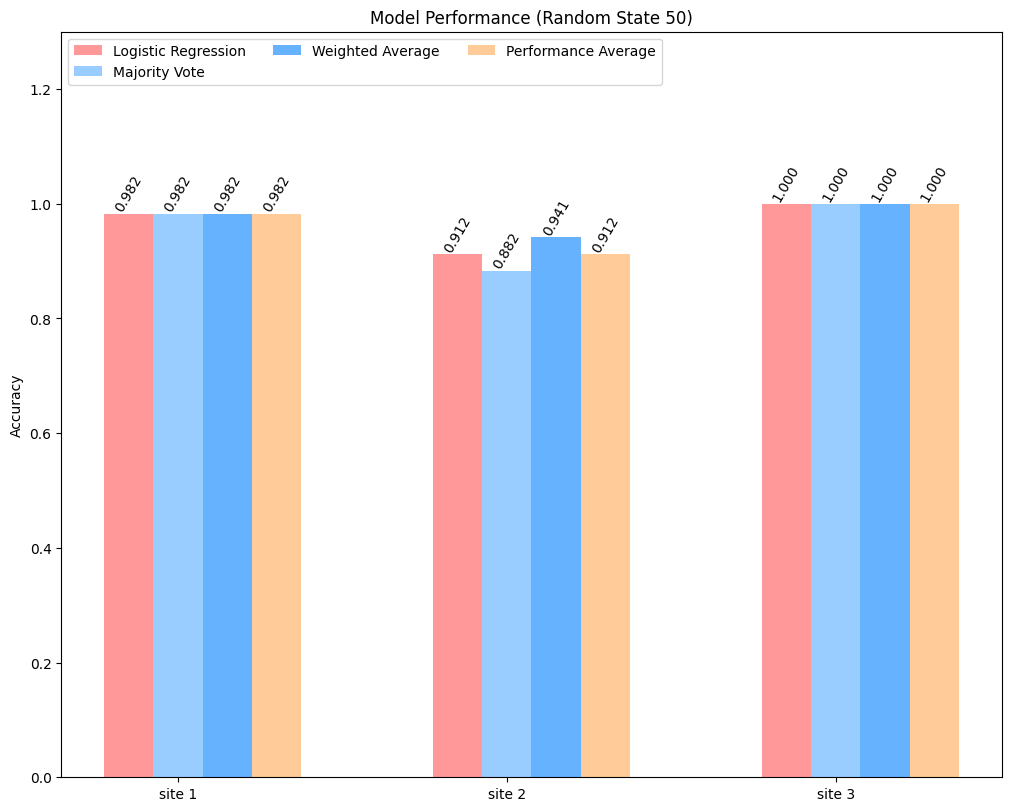

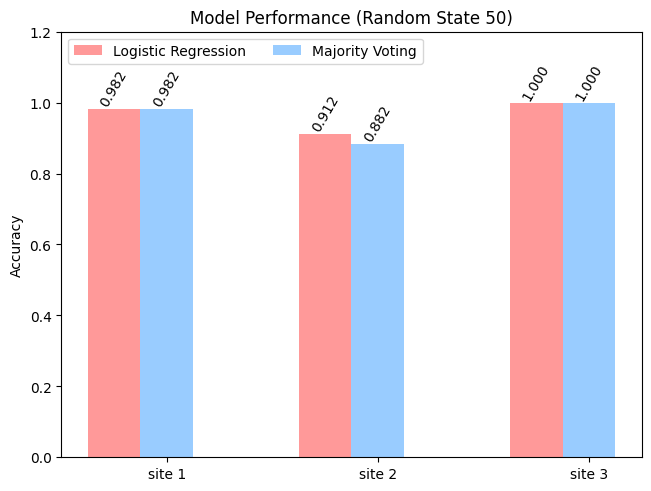

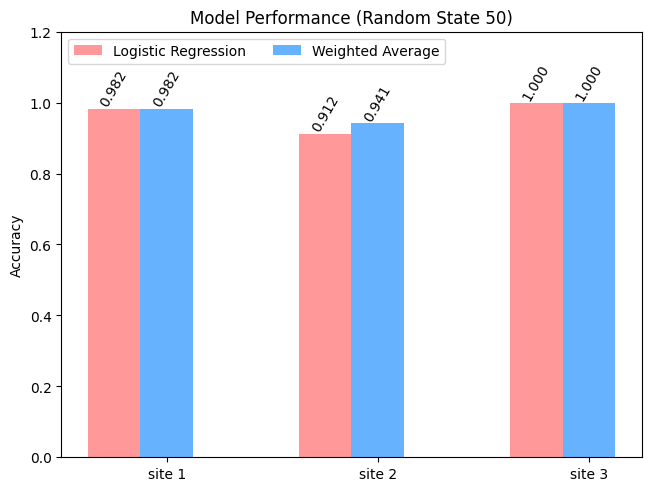

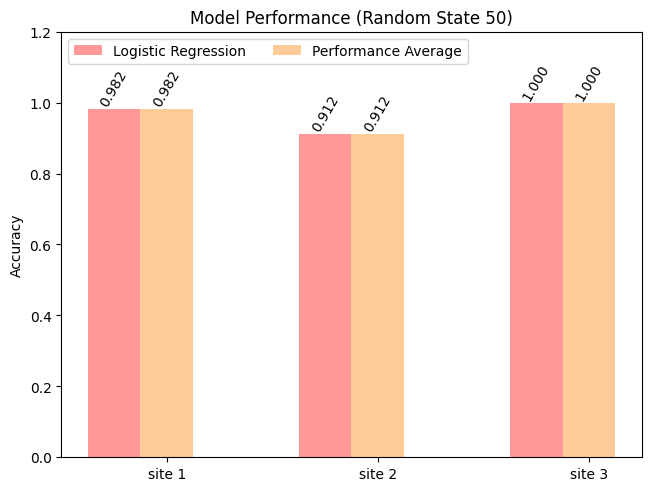

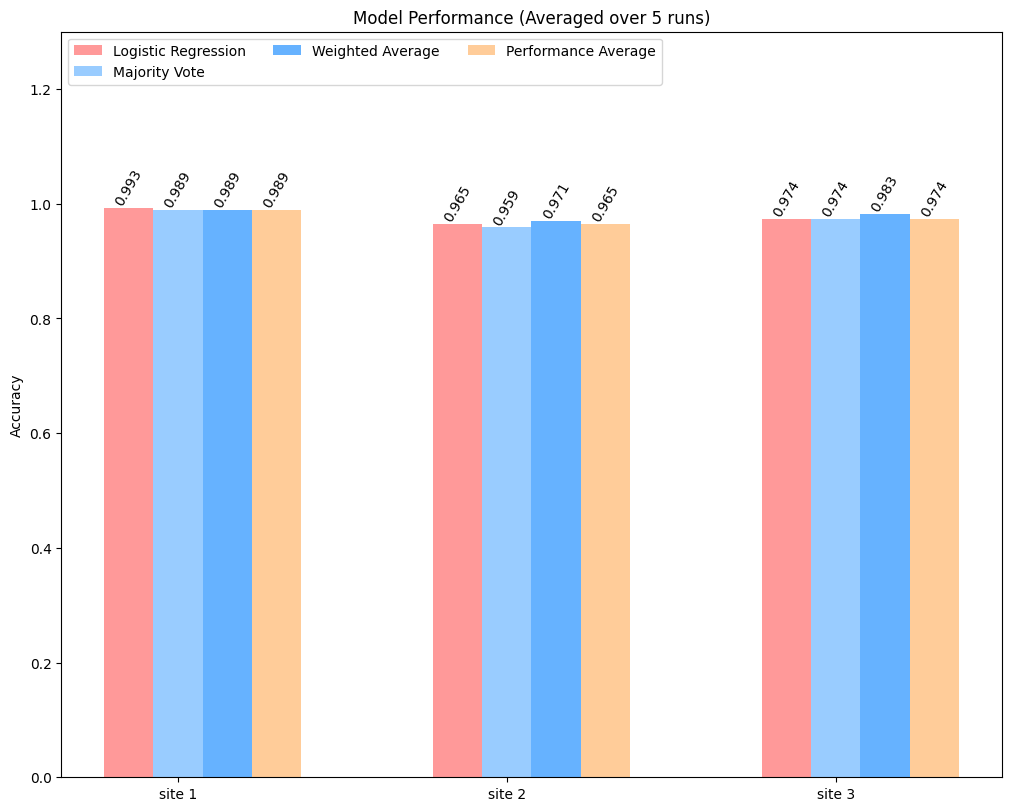

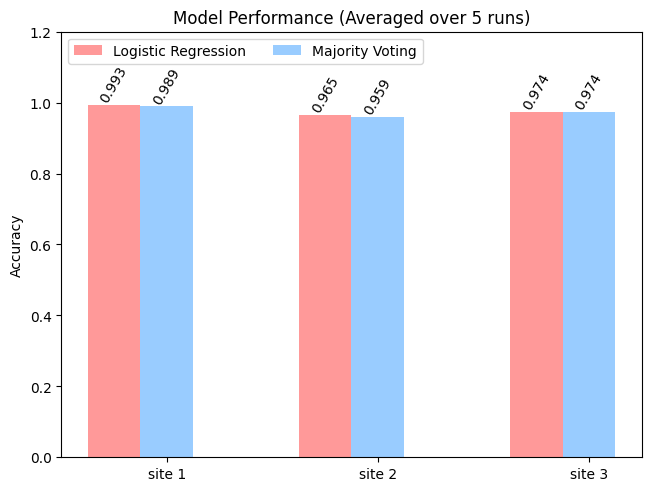

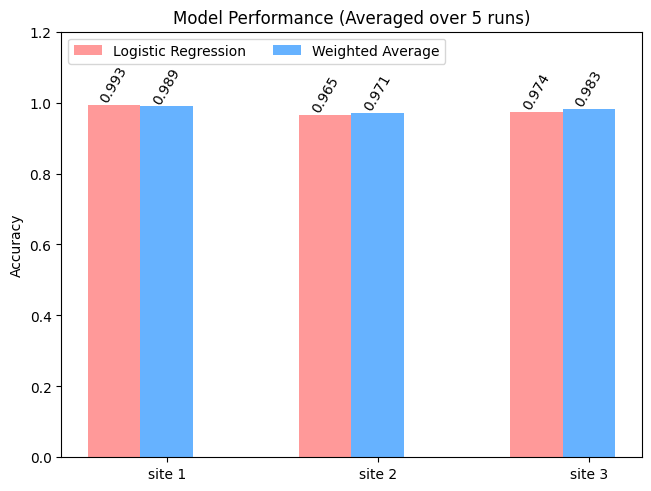

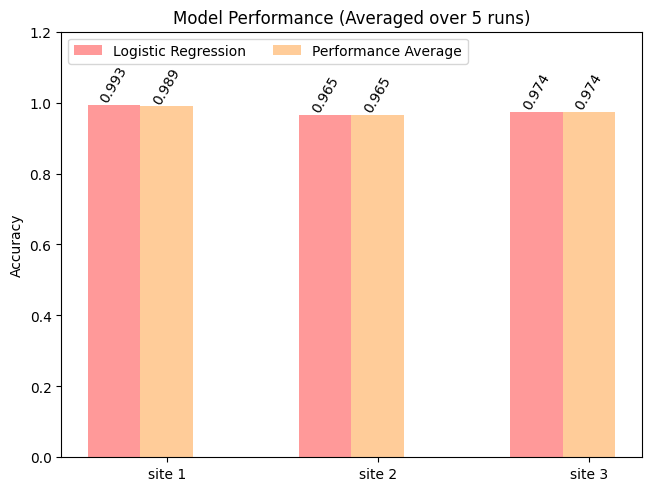

In [347]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)

In [348]:
help(plot_comparison)


Help on function plot_comparison in module __main__:

plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3, combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1, combined_w_site2, combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3, title, fname)



## Setting 3

In [349]:

X_temp, X_subsetSS1, y_temp, y_subsetSS1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_subsetSS2, X_subsetSS3, y_subsetSS2, y_subsetSS3 = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
print("Subset 1:", X_subsetSS1.shape, y_subsetSS1.shape)
print("Subset 2:", X_subsetSS2.shape, y_subsetSS2.shape)
print("Subset 3:", X_subsetSS3.shape, y_subsetSS3.shape)

Subset 1: (285, 30) (285,)
Subset 2: (170, 30) (170,)
Subset 3: (114, 30) (114,)


In [350]:
print(y_subsetSS1.value_counts())
print(y_subsetSS2.value_counts())
print(y_subsetSS3.value_counts())

Diagnosis
0    187
1     98
Name: count, dtype: int64
Diagnosis
0    98
1    72
Name: count, dtype: int64
Diagnosis
0    72
1    42
Name: count, dtype: int64


In [351]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = df3.drop(columns=["Diagnosis"])
  y = df3['Diagnosis']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=0.5, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.4,random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [352]:
def build_site_classifier(random_state, X, y, at_site):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [353]:
from sklearn.metrics import accuracy_score


In [354]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [355]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.5):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [356]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [357]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [358]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [359]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.20)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [360]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Vote': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Vote': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.30)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [361]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)
    plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, plot_title, fname)
    plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     plot_title,fname)
    plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     plot_title,fname)


###This cell is the main function call




In [362]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)






Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 0.9298245614035088
accuracy is 0.9411764705882353
accuracy is 1.0
Model's Accuracy at site 1:  0.9298245614035088
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  0.9565217391304348


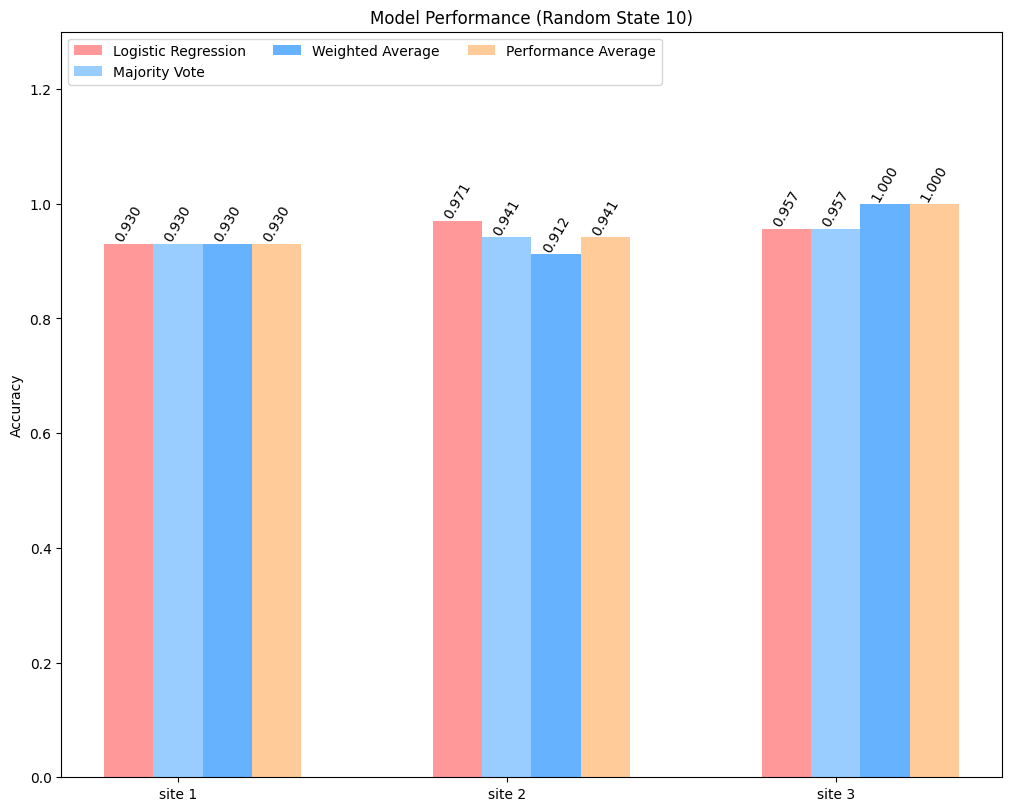

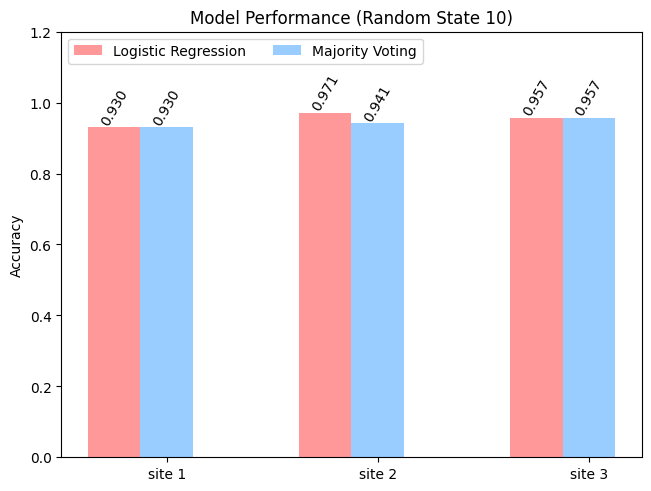

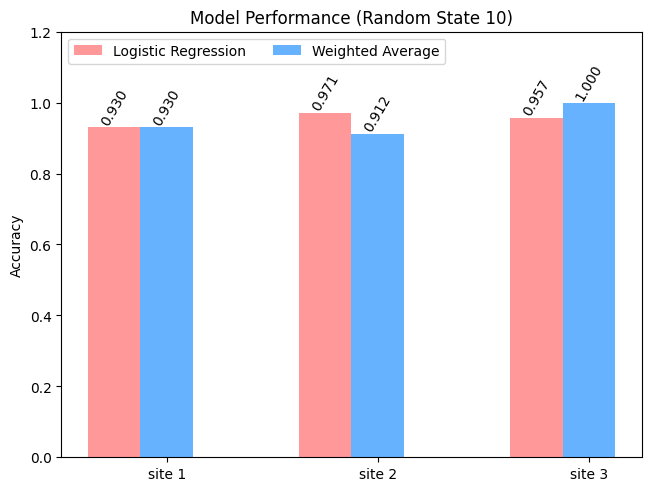

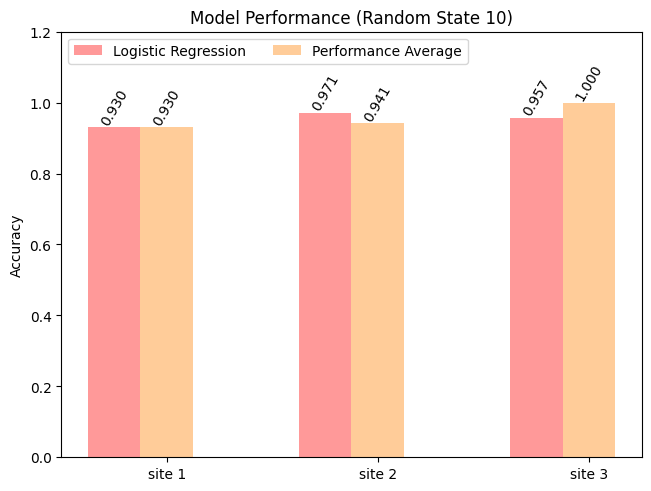

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 1.0
accuracy is 0.9705882352941176
accuracy is 1.0
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  0.9565217391304348


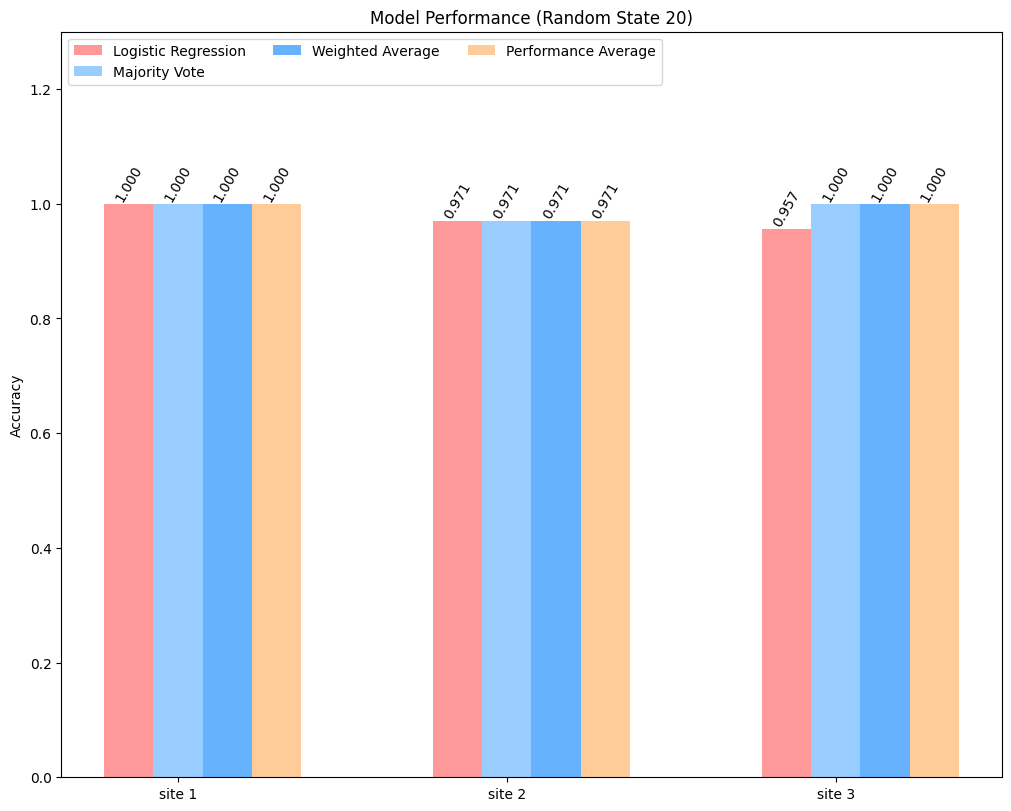

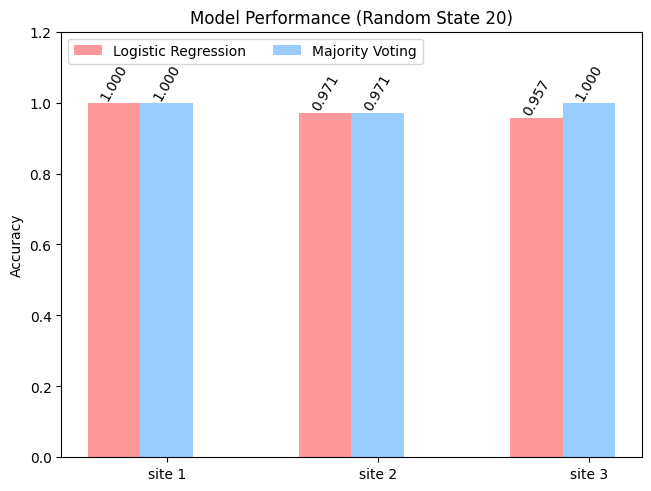

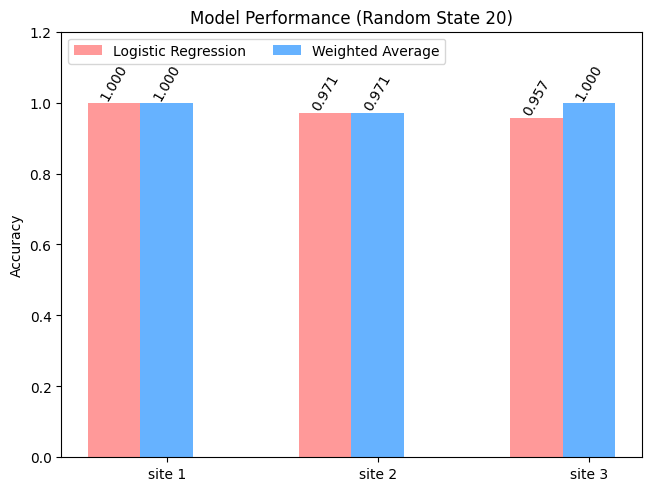

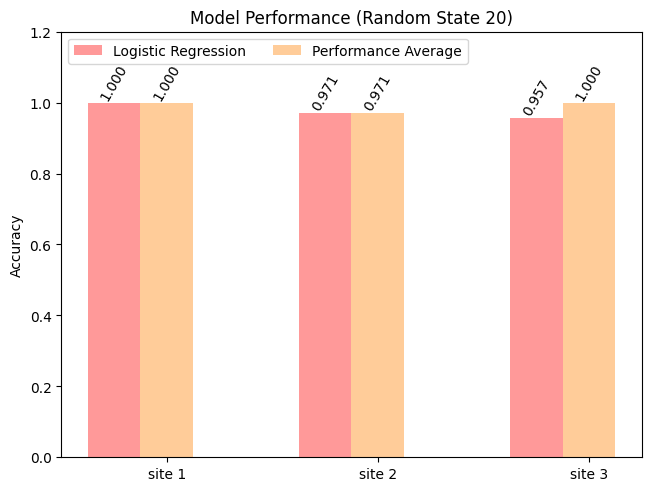

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 0.9649122807017544
accuracy is 1.0
accuracy is 1.0
Model's Accuracy at site 1:  0.9824561403508771
Model's Accuracy at site 2:  0.9705882352941176
Model's Accuracy at site 3:  1.0


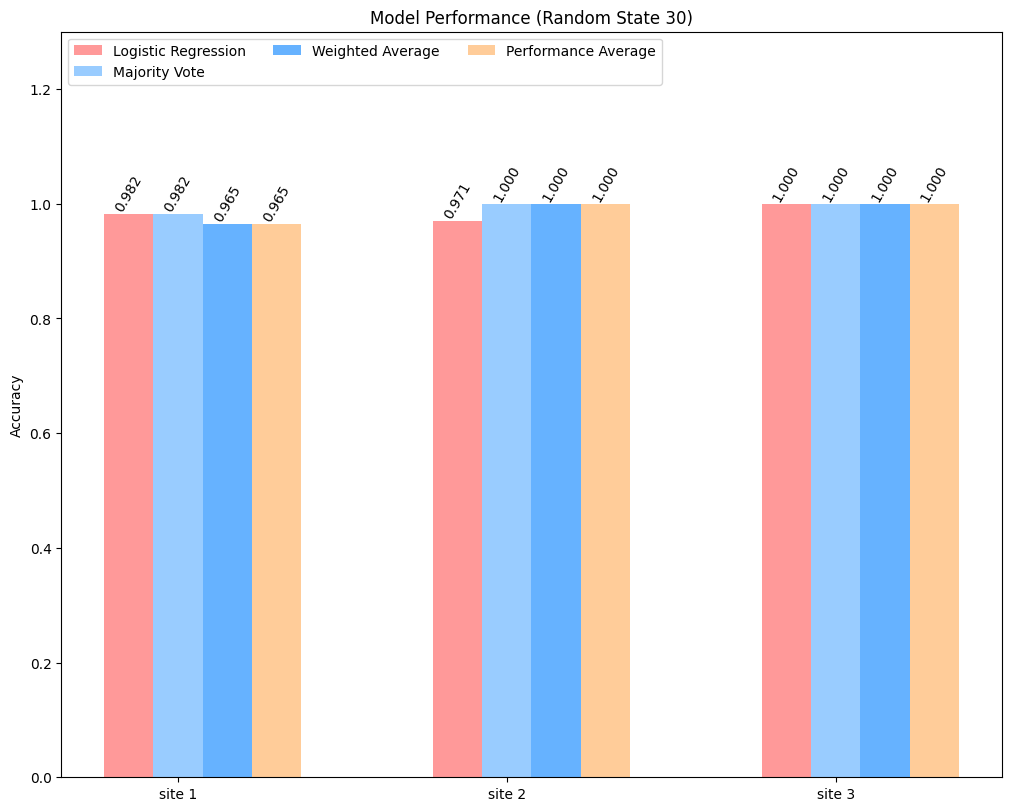

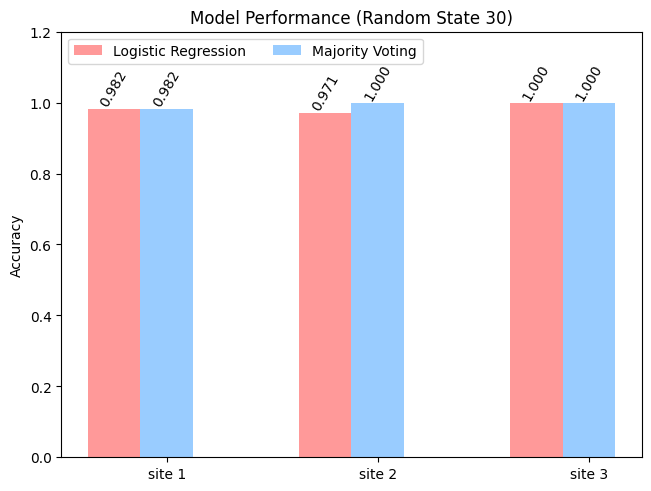

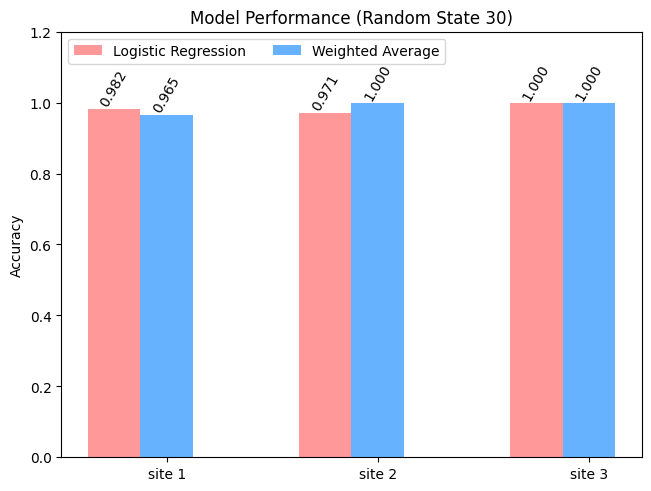

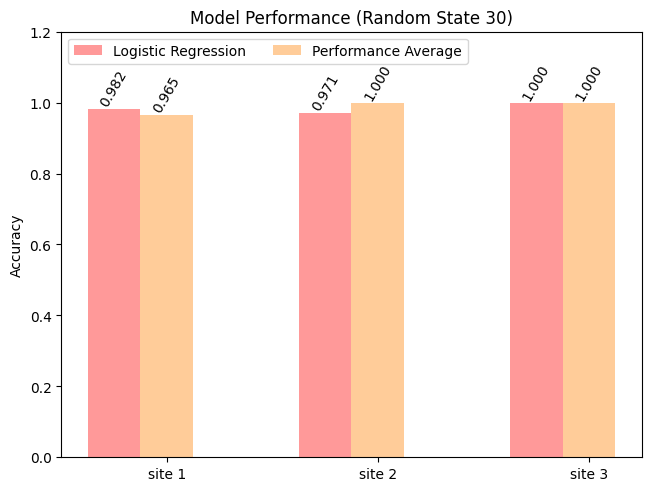

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 1.0
accuracy is 0.9117647058823529
accuracy is 1.0
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9117647058823529
Model's Accuracy at site 3:  1.0


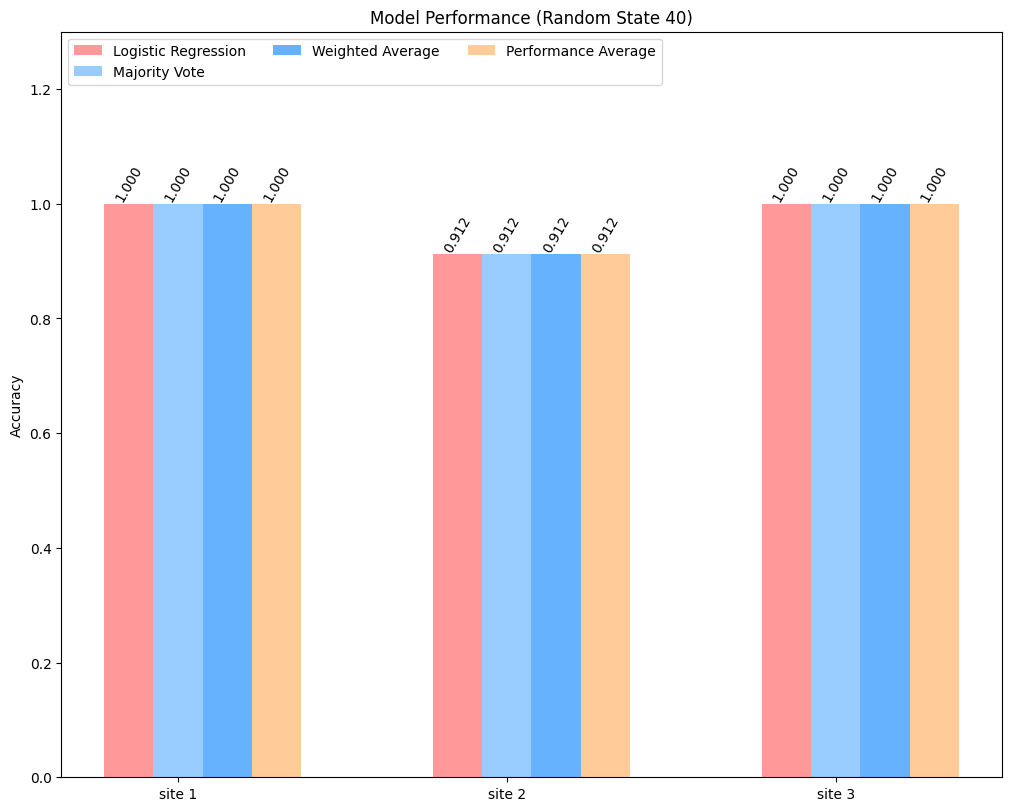

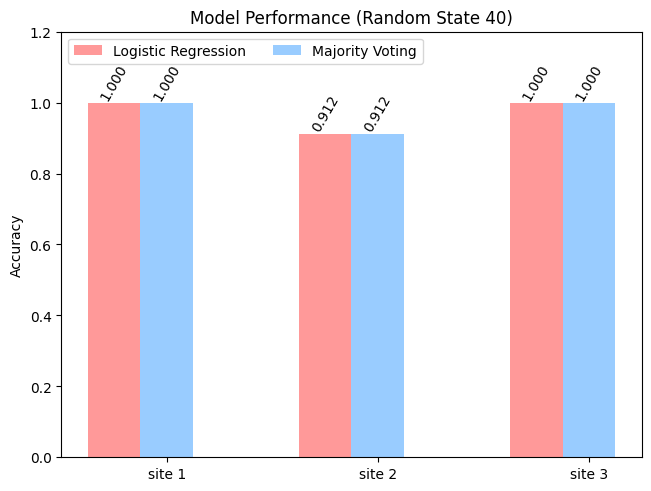

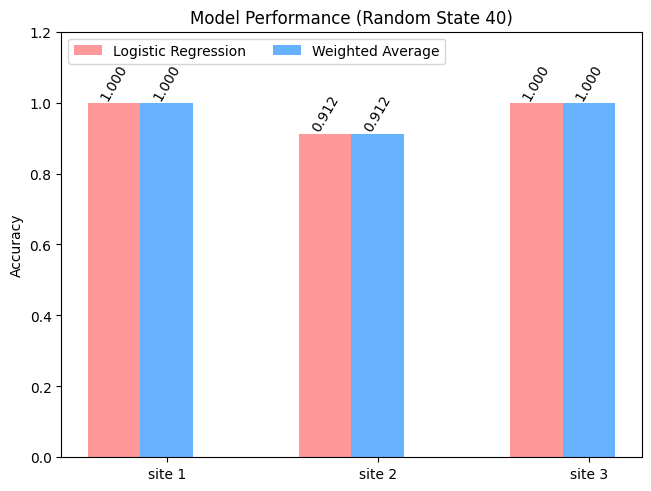

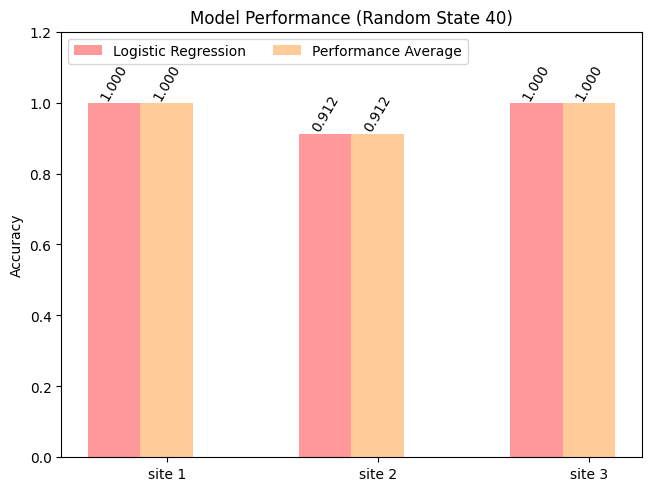

Data at site1:  (228, 30) (57, 30) (228,) (57,)
Data at site2:  (136, 30) (34, 30) (136,) (34,)
Data at site3:  (91, 30) (23, 30) (91,) (23,)
accuracy is 1.0
accuracy is 0.9411764705882353
accuracy is 0.9565217391304348
Model's Accuracy at site 1:  1.0
Model's Accuracy at site 2:  0.9411764705882353
Model's Accuracy at site 3:  0.9130434782608695


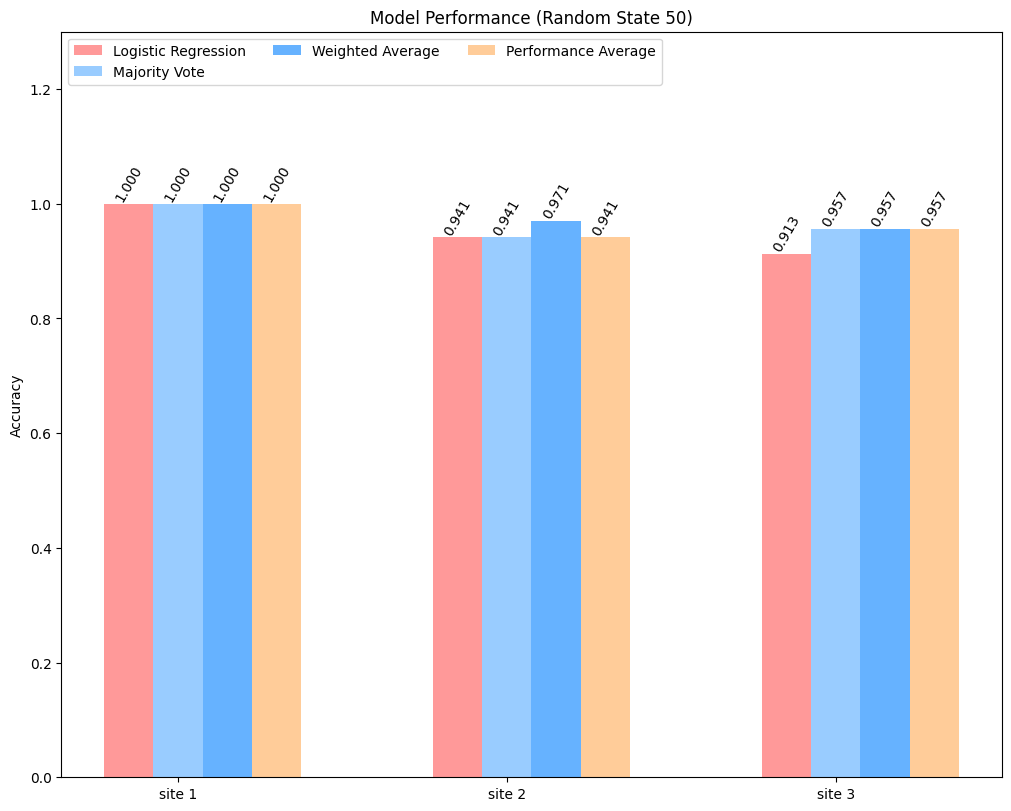

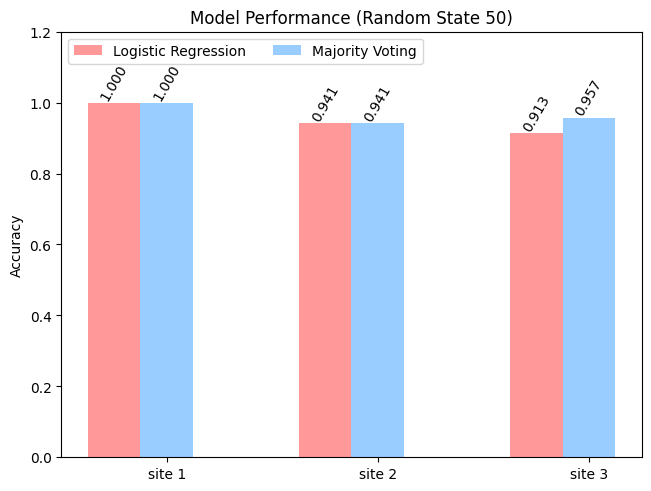

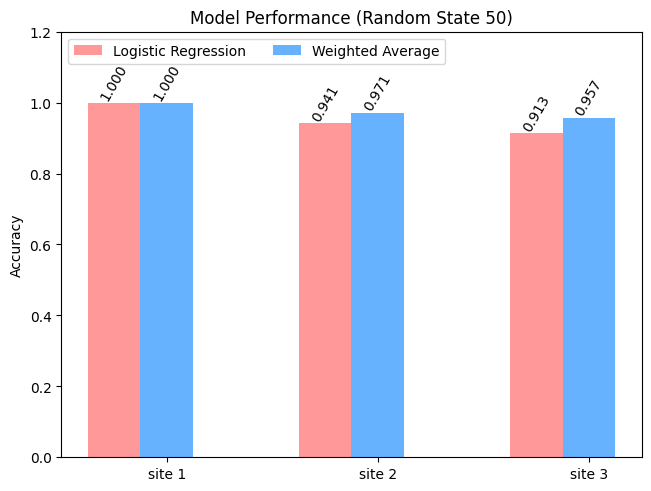

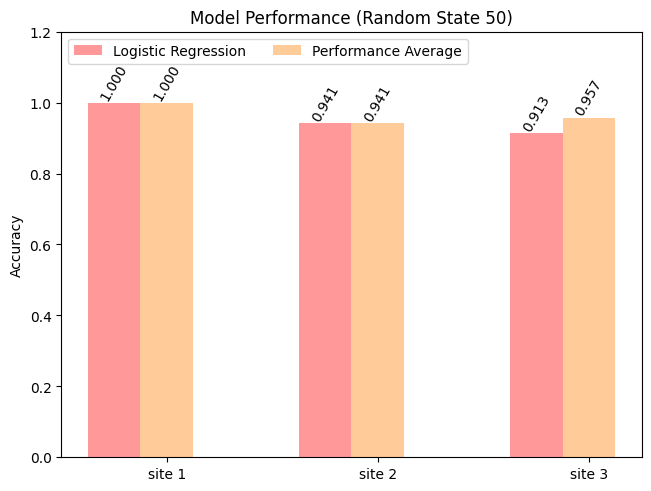

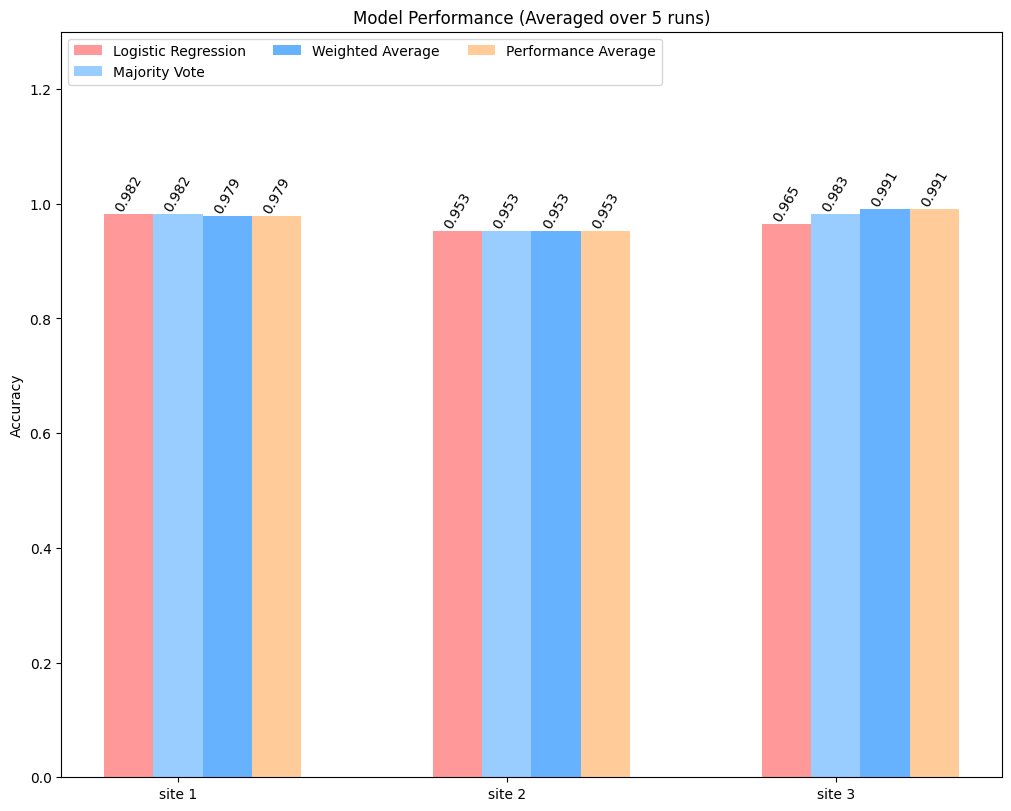

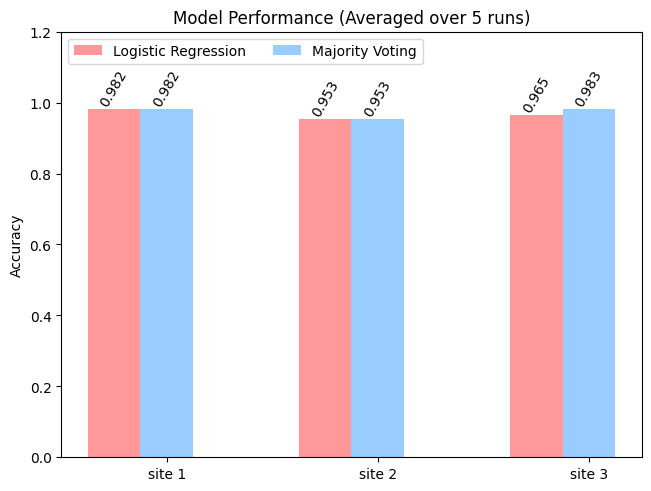

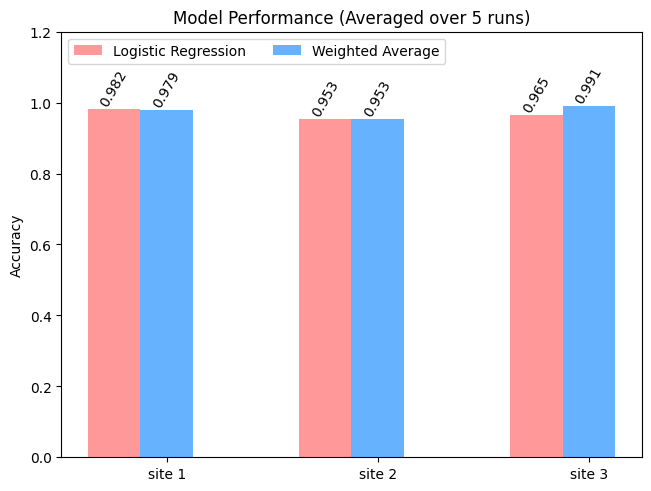

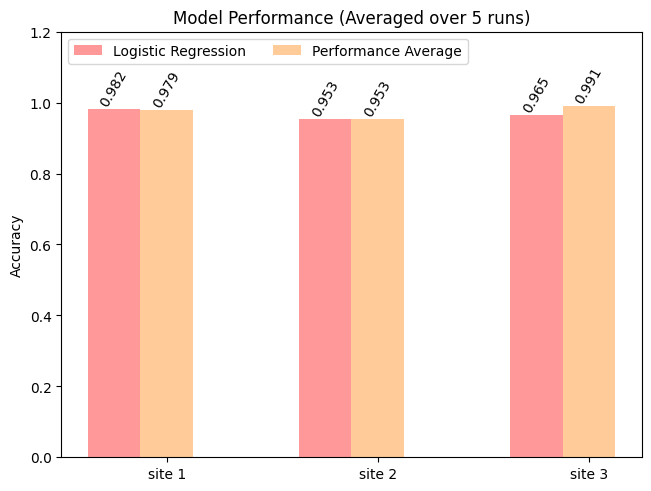

In [363]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)